<h1 align='center'>World Happiness Report 2023 Analysis</h1>

<h3 align='center'> Importing Libraries and DataFrame </h3>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.express as px
import dowhy
from dowhy import CausalModel

# importing dataframe
df = pd.read_csv("C:/Users/Davi Samora/OneDrive/Datasets/WHR_2023.csv")

<h2 align='center'> Data Preprocessing and Cleaning </h2>

In [2]:
# showing dataframe
df.head()

country                        region  happiness_score  gdp_per_capita  \
0      Finland                Western Europe            7.804           1.888   
1      Denmark                Western Europe            7.586           1.949   
2      Iceland                Western Europe            7.530           1.926   
3       Israel  Middle East and North Africa            7.473           1.833   
4  Netherlands                Western Europe            7.403           1.942   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0           1.585                    0.535                         0.772   
1           1.548                    0.537                         0.734   
2           1.620                    0.559                         0.738   
3           1.521                    0.577                         0.569   
4           1.488                    0.545                         0.672   

   generosity  perceptions_of_corruption  
0       0.126                      0.535  
1       0.208                      0.525  
2       0.250                      0.187  
3       0.124                      0.158  
4       0.251                      0.394

In [3]:
# shows the number of lines and columns of the dataframe
print(f'There is {df.shape[0]} columns and {df.shape[1]} rows in the dataframe')

There is 137 columns and 9 rows in the dataframe


In [4]:
# shows the number of diferents regions
print(f'The dataset has {df["region"].nunique()} diferents regions')

The dataset has 10 diferents regions


In [5]:
# shows the type of data for each column
df.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [6]:
# shows infomation about the dataframe like columns, lines, name of columns, type of data, and RAM memory used
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


    All data are in the correct format, there is no need to transform them

In [7]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [8]:
# Count the null values in the dataframe
df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

    There is only one "null" value in the dataframe, and is on  the "healthy_life_expectancy" column. 

In [9]:
# remove lines with null values in the dataframe
df.dropna(inplace=True)

In [10]:
# Count the null values in the dataframe
df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

    Now all the columns are free from the null values

<h2 align='center'> Exploratory Data Analysis </h2>

In [11]:
# Count of unique values for 'country' and 'region'
df['region'].value_counts()

region
Sub-Saharan Africa                    33
Central and Eastern Europe            22
Western Europe                        20
Latin America and Caribbean           19
Middle East and North Africa          13
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Commonwealth of Independent States     4
Name: count, dtype: int64

In [12]:
# create a dataframe only with Brazil
home = df[df["country"] == "Brazil"]
# crate a dataframe only with Brazil, and hapiness score
home_happiness = home["happiness_score"]
# print the dataframe
print(f'The country I am from has a happiness score of {home_happiness.values[0]:.2f}')

The country I am from has a happiness score of 6.12


In [13]:
# is used to generate summarized descriptive statistics of the numeric columns in the DataFrame
df.describe().T

count      mean       std    min      25%  \
happiness_score               136.0  5.544441  1.142841  1.859  4.70250   
gdp_per_capita                136.0  1.408919  0.433969  0.000  1.09775   
social_support                136.0  1.155088  0.327263  0.000  0.95975   
healthy_life_expectancy       136.0  0.366176  0.156691  0.000  0.24850   
freedom_to_make_life_choices  136.0  0.540912  0.149671  0.000  0.45875   
generosity                    136.0  0.149088  0.075993  0.000  0.09850   
perceptions_of_corruption     136.0  0.146478  0.127009  0.000  0.05975   

                                 50%      75%    max  
happiness_score               5.6935  6.34250  7.804  
gdp_per_capita                1.4515  1.79800  2.200  
social_support                1.2255  1.40125  1.620  
healthy_life_expectancy       0.3895  0.48750  0.702  
freedom_to_make_life_choices  0.5575  0.65675  0.772  
generosity                    0.1375  0.19925  0.422  
perceptions_of_corruption     0.1120  0.18825  0.561

In [14]:
# Assert that no country appears more than once
assert not (df['country'].value_counts() > 1).any(), "Some countries appear more than once."

    There's no country that appears more than once on the dataframe

In [15]:
# Countries with the top 5 happiness scores
df.nlargest(5, 'happiness_score')

country                        region  happiness_score  gdp_per_capita  \
0      Finland                Western Europe            7.804           1.888   
1      Denmark                Western Europe            7.586           1.949   
2      Iceland                Western Europe            7.530           1.926   
3       Israel  Middle East and North Africa            7.473           1.833   
4  Netherlands                Western Europe            7.403           1.942   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0           1.585                    0.535                         0.772   
1           1.548                    0.537                         0.734   
2           1.620                    0.559                         0.738   
3           1.521                    0.577                         0.569   
4           1.488                    0.545                         0.672   

   generosity  perceptions_of_corruption  
0       0.126                      0.535  
1       0.208                      0.525  
2       0.250                      0.187  
3       0.124                      0.158  
4       0.251                      0.394

In [16]:
# Countries with the bottom 5 happiness scores
df.nsmallest(5, 'happiness_score')

country                        region  happiness_score  \
136       Afghanistan                    South Asia            1.859   
135           Lebanon  Middle East and North Africa            2.392   
134      Sierra Leone            Sub-Saharan Africa            3.138   
133          Zimbabwe            Sub-Saharan Africa            3.204   
132  Congo (Kinshasa)            Sub-Saharan Africa            3.207   

     gdp_per_capita  social_support  healthy_life_expectancy  \
136           0.645           0.000                    0.087   
135           1.417           0.476                    0.398   
134           0.670           0.540                    0.092   
133           0.758           0.881                    0.069   
132           0.531           0.784                    0.105   

     freedom_to_make_life_choices  generosity  perceptions_of_corruption  
136                         0.000       0.093                      0.059  
135                         0.123       0.061                      0.027  
134                         0.371       0.193                      0.051  
133                         0.363       0.112                      0.117  
132                         0.375       0.183                      0.068

In [17]:
# Correlation between variables
df.corr(numeric_only=True)

happiness_score  gdp_per_capita  social_support  \
happiness_score                      1.000000        0.783811        0.838161   
gdp_per_capita                       0.783811        1.000000        0.741715   
social_support                       0.838161        0.741715        1.000000   
healthy_life_expectancy              0.746699        0.837518        0.725334   
freedom_to_make_life_choices         0.661944        0.449433        0.546545   
generosity                           0.039395       -0.162667        0.039753   
perceptions_of_corruption            0.470568        0.435398        0.275316   

                              healthy_life_expectancy  \
happiness_score                              0.746699   
gdp_per_capita                               0.837518   
social_support                               0.725334   
healthy_life_expectancy                      1.000000   
freedom_to_make_life_choices                 0.414965   
generosity                                  -0.135522   
perceptions_of_corruption                    0.404417   

                              freedom_to_make_life_choices  generosity  \
happiness_score                                   0.661944    0.039395   
gdp_per_capita                                    0.449433   -0.162667   
social_support                                    0.546545    0.039753   
healthy_life_expectancy                           0.414965   -0.135522   
freedom_to_make_life_choices                      1.000000    0.164093   
generosity                                        0.164093    1.000000   
perceptions_of_corruption                         0.381367    0.117343   

                              perceptions_of_corruption  
happiness_score                                0.470568  
gdp_per_capita                                 0.435398  
social_support                                 0.275316  
healthy_life_expectancy                        0.404417  
freedom_to_make_life_choices                   0.381367  
generosity                                     0.117343  
perceptions_of_corruption                      1.000000

In [18]:
# Averages of numerical variables by region
df.groupby('region')["happiness_score"].mean()

region
Central and Eastern Europe            5.967091
Commonwealth of Independent States    5.828250
East Asia                             5.930167
Latin America and Caribbean           5.966053
Middle East and North Africa          5.117077
North America and ANZ                 7.018250
South Asia                            4.089000
Southeast Asia                        5.431222
Sub-Saharan Africa                    4.382485
Western Europe                        6.894350
Name: happiness_score, dtype: float64

In [19]:
# Range of happiness scores by region
happiness_range = df.groupby('region')['happiness_score'].agg([min, max])
happiness_range.T

region  Central and Eastern Europe  Commonwealth of Independent States  \
min                          5.071                               5.330   
max                          6.845                               6.144   

region  East Asia  Latin America and Caribbean  Middle East and North Africa  \
min         5.308                        5.211                         2.392   
max         6.535                        6.609                         7.473   

region  North America and ANZ  South Asia  Southeast Asia  Sub-Saharan Africa  \
min                     6.894       1.859           4.372               3.138   
max                     7.123       5.360           6.587               5.902   

region  Western Europe  
min              5.931  
max              7.804

In [20]:
# Filtrar o DataFrame para a região 'Middle East and North Africa'
filtered_df = df[df['region'] == 'Middle East and North Africa']

# Encontrar a linha com a maior 'happiness_score' para a região filtrada
top_country = filtered_df.nlargest(1, 'happiness_score')

top_country.T

3
country                                             Israel
region                        Middle East and North Africa
happiness_score                                      7.473
gdp_per_capita                                       1.833
social_support                                       1.521
healthy_life_expectancy                              0.577
freedom_to_make_life_choices                         0.569
generosity                                           0.124
perceptions_of_corruption                            0.158

In [21]:
# Filtrar o DataFrame para a região 'Middle East and North Africa'
filtered_df2 = df[df['region'] == 'Middle East and North Africa']

# Encontrar a linha com a maior 'happiness_score' para a região filtrada
last_country = filtered_df.nsmallest(1, 'happiness_score')

last_country.T

135
country                                            Lebanon
region                        Middle East and North Africa
happiness_score                                      2.392
gdp_per_capita                                       1.417
social_support                                       0.476
healthy_life_expectancy                              0.398
freedom_to_make_life_choices                         0.123
generosity                                           0.061
perceptions_of_corruption                            0.027

In [22]:
# Filter the DataFrame to shows only Israel and Lebanon
israel_and_lebanon = df[df['country'].isin(['Israel', 'Lebanon'])]

israel_and_lebanon

country                        region  happiness_score  gdp_per_capita  \
3     Israel  Middle East and North Africa            7.473           1.833   
135  Lebanon  Middle East and North Africa            2.392           1.417   

     social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
3             1.521                    0.577                         0.569   
135           0.476                    0.398                         0.123   

     generosity  perceptions_of_corruption  
3         0.124                      0.158  
135       0.061                      0.027

Israel and Lebanon
    
      The region that shows the biggest range between the minimum and maximum on Happiness Score is the Middle East and North Africa. And the countries that reveals this diference are neighbors. Israel has a Score of 7.473, and Lebanon with 2.392. a diference of 5.081. With these scores, Israel is the Fourth happiest country in 2023, and Lebanon is  the penultimate.

In [23]:
# Group by 'region' and calculate the mean 'healthy_life_expectancy' and 'gdp_per_capita'
health_gdp_by_region = df.groupby('region')[['healthy_life_expectancy', 'gdp_per_capita']].mean()
health_gdp_by_region

healthy_life_expectancy  gdp_per_capita
region                                                                     
Central and Eastern Europe                         0.430545        1.618364
Commonwealth of Independent States                 0.368000        1.231000
East Asia                                          0.521833        1.734667
Latin America and Caribbean                        0.412158        1.349632
Middle East and North Africa                       0.403846        1.543077
North America and ANZ                              0.494000        1.900500
South Asia                                         0.259833        1.069833
Southeast Asia                                     0.360333        1.400889
Sub-Saharan Africa                                 0.148788        0.912848
Western Europe                                     0.547800        1.911050

In [24]:
# Group by 'region' and calculate the mean 'social_support' and 'freedom_to_make_life_choices'
support_freedom_by_region = df.groupby('region')[['social_support', 'freedom_to_make_life_choices']].mean()
support_freedom_by_region

social_support  \
region                                               
Central and Eastern Europe                1.361545   
Commonwealth of Independent States        1.381250   
East Asia                                 1.316667   
Latin America and Caribbean               1.260000   
Middle East and North Africa              1.063692   
North America and ANZ                     1.496250   
South Asia                                0.682500   
Southeast Asia                            1.149333   
Sub-Saharan Africa                        0.812788   
Western Europe                            1.434950   

                                    freedom_to_make_life_choices  
region                                                            
Central and Eastern Europe                              0.566227  
Commonwealth of Independent States                      0.675500  
East Asia                                               0.510333  
Latin America and Caribbean                             0.605895  
Middle East and North Africa                            0.435308  
North America and ANZ                                   0.640500  
South Asia                                              0.486500  
Southeast Asia                                          0.667111  
Sub-Saharan Africa                                      0.428394  
Western Europe                                          0.627500

In [25]:
# Group by 'region' and calculate the mean 'generosity' and 'gdp_per_capita', then sort by 'gdp_per_capita'
generosity_gdp_by_region = df.groupby('region')[['generosity', 'gdp_per_capita']].mean().sort_values(by='gdp_per_capita')
generosity_gdp_by_region

generosity  gdp_per_capita
region                                                        
Sub-Saharan Africa                    0.164727        0.912848
South Asia                            0.147167        1.069833
Commonwealth of Independent States    0.183500        1.231000
Latin America and Caribbean           0.109158        1.349632
Southeast Asia                        0.233778        1.400889
Middle East and North Africa          0.101923        1.543077
Central and Eastern Europe            0.137273        1.618364
East Asia                             0.110833        1.734667
North America and ANZ                 0.225000        1.900500
Western Europe                        0.156750        1.911050

In [26]:
# Group by 'region' and calculate the mean 'happiness_score', 'social_support', 'healthy_life_expectancy'
multivar_analysis = df.groupby('region')[['happiness_score', 'social_support', 'healthy_life_expectancy']].mean()
multivar_analysis

happiness_score  social_support  \
region                                                                
Central and Eastern Europe                 5.967091        1.361545   
Commonwealth of Independent States         5.828250        1.381250   
East Asia                                  5.930167        1.316667   
Latin America and Caribbean                5.966053        1.260000   
Middle East and North Africa               5.117077        1.063692   
North America and ANZ                      7.018250        1.496250   
South Asia                                 4.089000        0.682500   
Southeast Asia                             5.431222        1.149333   
Sub-Saharan Africa                         4.382485        0.812788   
Western Europe                             6.894350        1.434950   

                                    healthy_life_expectancy  
region                                                       
Central and Eastern Europe                         0.430545  
Commonwealth of Independent States                 0.368000  
East Asia                                          0.521833  
Latin America and Caribbean                        0.412158  
Middle East and North Africa                       0.403846  
North America and ANZ                              0.494000  
South Asia                                         0.259833  
Southeast Asia                                     0.360333  
Sub-Saharan Africa                                 0.148788  
Western Europe                                     0.547800

In [27]:
# Average GDP per capita by region
average_gdp_per_region = df.groupby('region')['gdp_per_capita'].mean()
average_gdp_per_region

region
Central and Eastern Europe            1.618364
Commonwealth of Independent States    1.231000
East Asia                             1.734667
Latin America and Caribbean           1.349632
Middle East and North Africa          1.543077
North America and ANZ                 1.900500
South Asia                            1.069833
Southeast Asia                        1.400889
Sub-Saharan Africa                    0.912848
Western Europe                        1.911050
Name: gdp_per_capita, dtype: float64

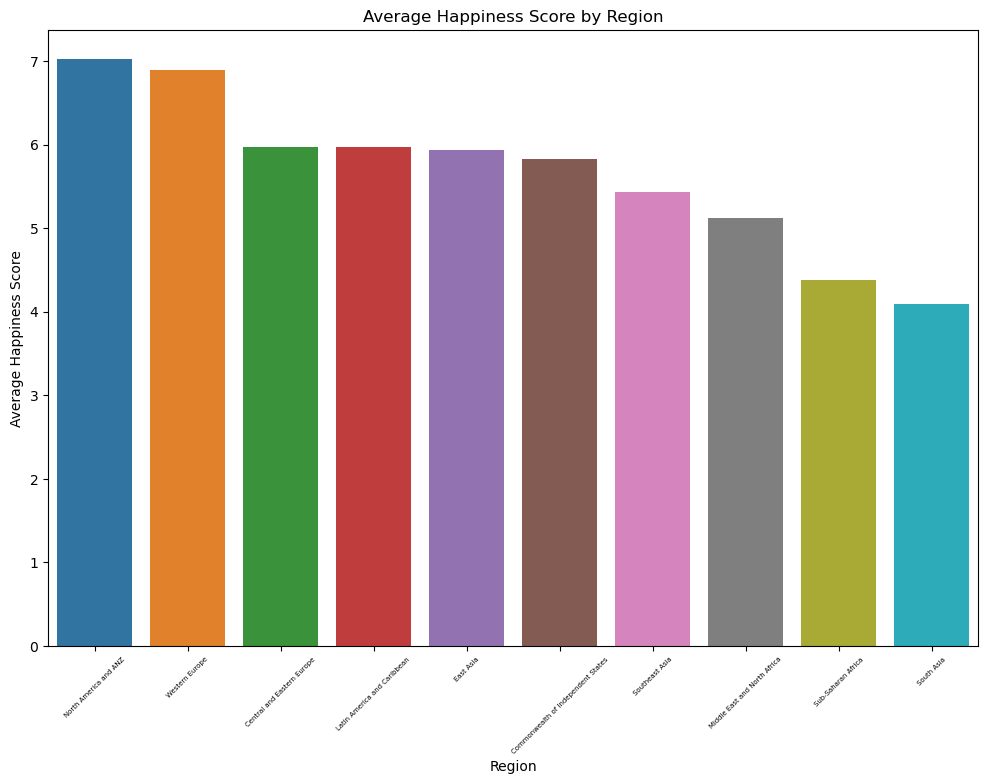

In [28]:
# Group the DataFrame by the "region" column and calculate the mean of the "happiness_score" for each region.
region_mean = df.groupby("region")["happiness_score"].mean().sort_values(ascending=False).reset_index()

# Create a new figure for the plot with custom dimensions.
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn, using the reordered data in the region_mean DataFrame.
sns.barplot(data=region_mean, x="region", y="happiness_score")

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45, fontsize=5)

# Set a title for the plot.
plt.title("Average Happiness Score by Region")

# Label the x-axis.
plt.xlabel("Region")

# Label the y-axis.
plt.ylabel("Average Happiness Score")

# Display the plot.
plt.show()

    It shows that except the North America and ANZ, the Western Europe, that are the "happier" regions, and Sub-Saharar         Africa and South Asia, are the "less happy" regions, all the others regions presents a similar happiness score. 

In [29]:
def print_top_countries(data_frame, num_countries, ascending=True):
    top_countries = data_frame.nsmallest(num_countries * 2, 
                                         'happiness_score') if ascending else data_frame.nlargest(num_countries * 2,
                                                                                                  'happiness_score')

    print("\n" + "-" * 51)
    print(f"|{'':^49}|")
    print(f"|{'Top 10 Least Happy Countries' if ascending else 'Top 10 Happiest Countries':^49}|")
    print(f"|{'':^49}|")
    print("-" * 51)

    printed_countries = set()  # Conjunto para rastrear los países ya impresos
    countries_printed = 0  # Contador de países impresos

    for index, row in top_countries.iterrows():
        country = row['country']
        if country not in printed_countries and countries_printed < num_countries:
            print(f"| {country:<40} | {row['happiness_score']:.2f} |")
            printed_countries.add(country)  # Agregar el país al conjunto de países impresos
            countries_printed += 1

    print("-" * 51)

# 10 Least Happy Countries
print_top_countries(df, 10, ascending=True)

# 10 Happiest Countries
print_top_countries(df,10, ascending=False)


---------------------------------------------------
|                                                 |
|          Top 10 Least Happy Countries           |
|                                                 |
---------------------------------------------------
| Afghanistan                              | 1.86 |
| Lebanon                                  | 2.39 |
| Sierra Leone                             | 3.14 |
| Zimbabwe                                 | 3.20 |
| Congo (Kinshasa)                         | 3.21 |
| Botswana                                 | 3.44 |
| Malawi                                   | 3.50 |
| Comoros                                  | 3.54 |
| Tanzania                                 | 3.69 |
| Zambia                                   | 3.98 |
---------------------------------------------------

---------------------------------------------------
|                                                 |
|            Top 10 Happiest Countries            |
|         

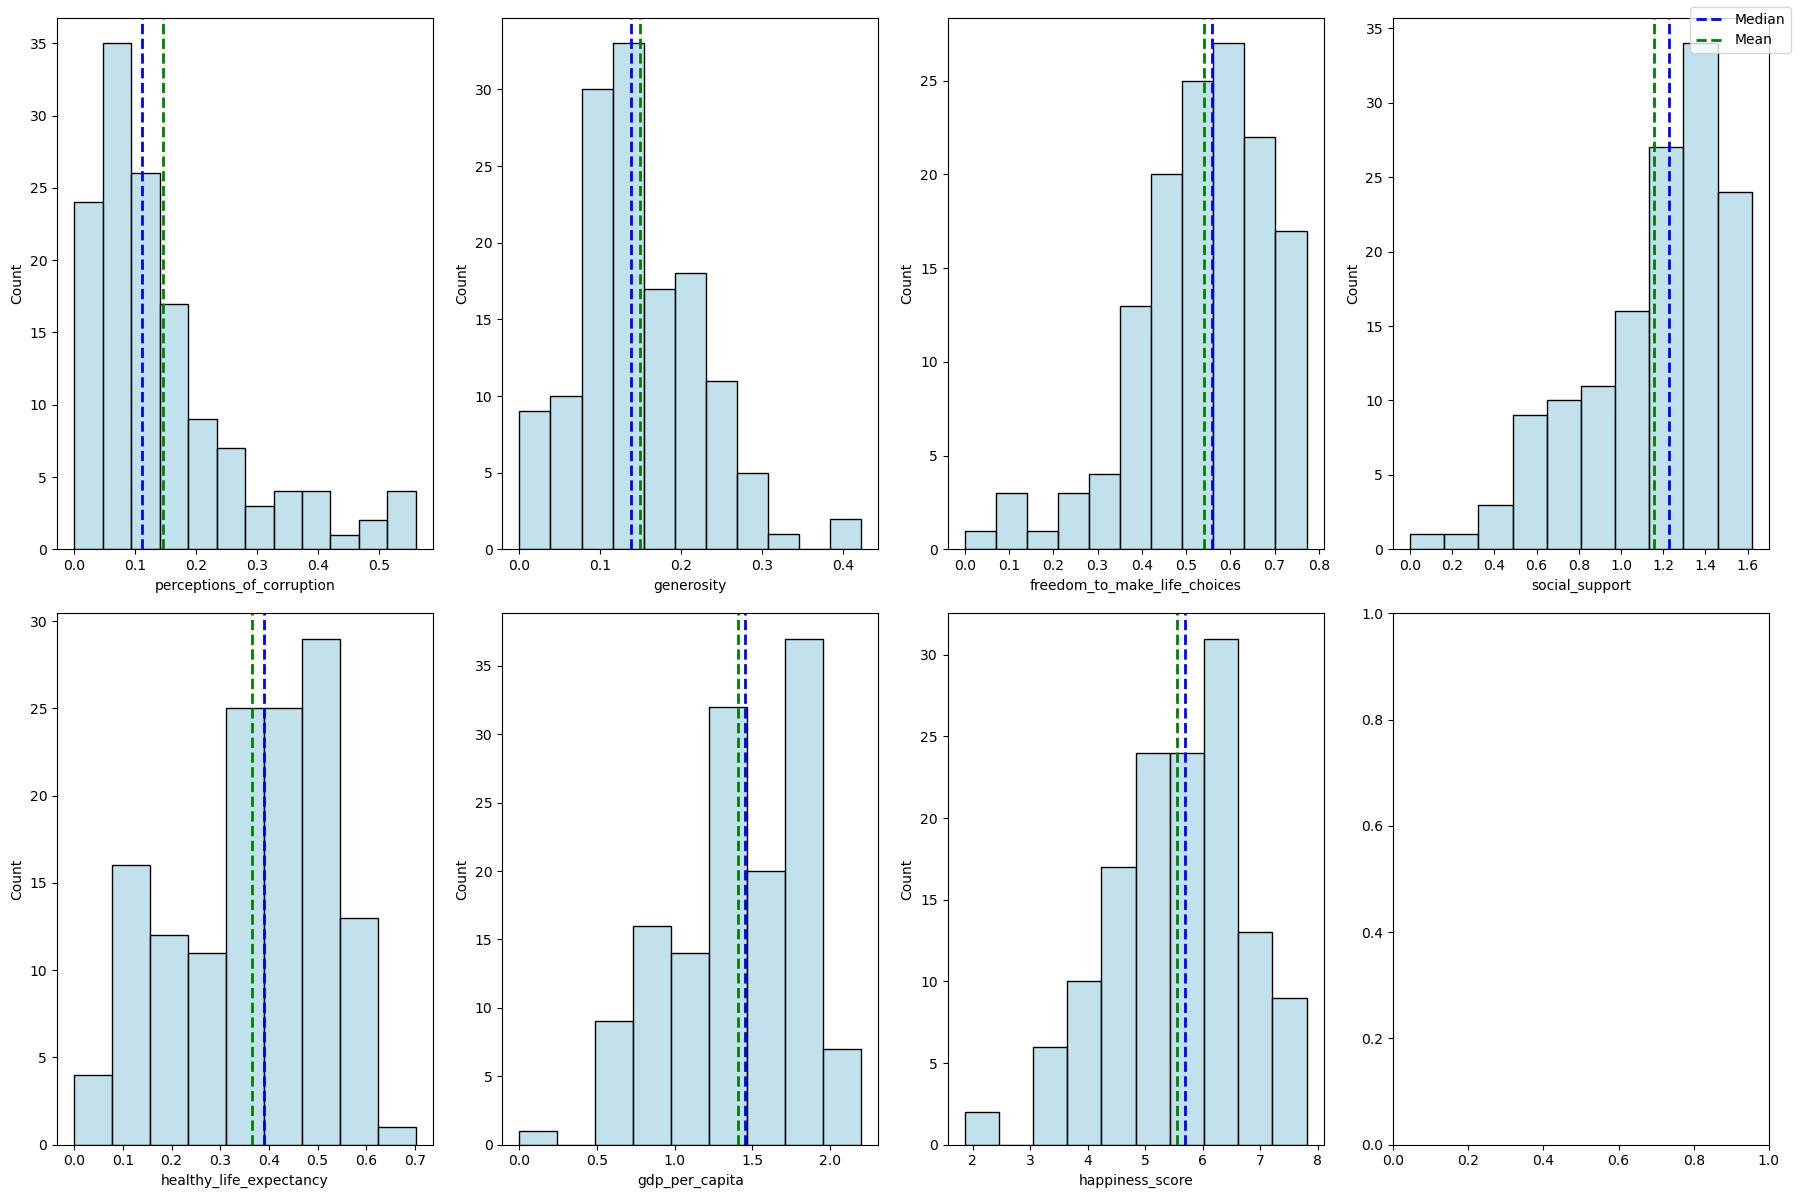

In [30]:
# create a variable only with numeric columns
variables = ['perceptions_of_corruption', 'generosity', 'freedom_to_make_life_choices', 
             'social_support', 'healthy_life_expectancy', 'gdp_per_capita', 'happiness_score']

# create a subplot grid
fig, axs = plt.subplots(2, 4, figsize=(18, 12))

# Iterate over the variables and plot a histplot for each subplot
for i, var in enumerate(variables):
    sns.histplot(df[var], color="lightblue", ax=axs[i//4, i%4])
    median_var = df[var].median()
    mean_var = df[var].mean()
    axs[i//4, i%4].axvline(median_var, color="blue", linestyle="dashed", linewidth=2, label='Median')
    axs[i//4, i%4].axvline(mean_var, color="green", linestyle="dashed", linewidth=2, label='Mean')

# add legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

    It's interesting to see that mean and the median are close to each other, it suggests that there's no significant  skewness in the distribution, and our data do not show much outliers.

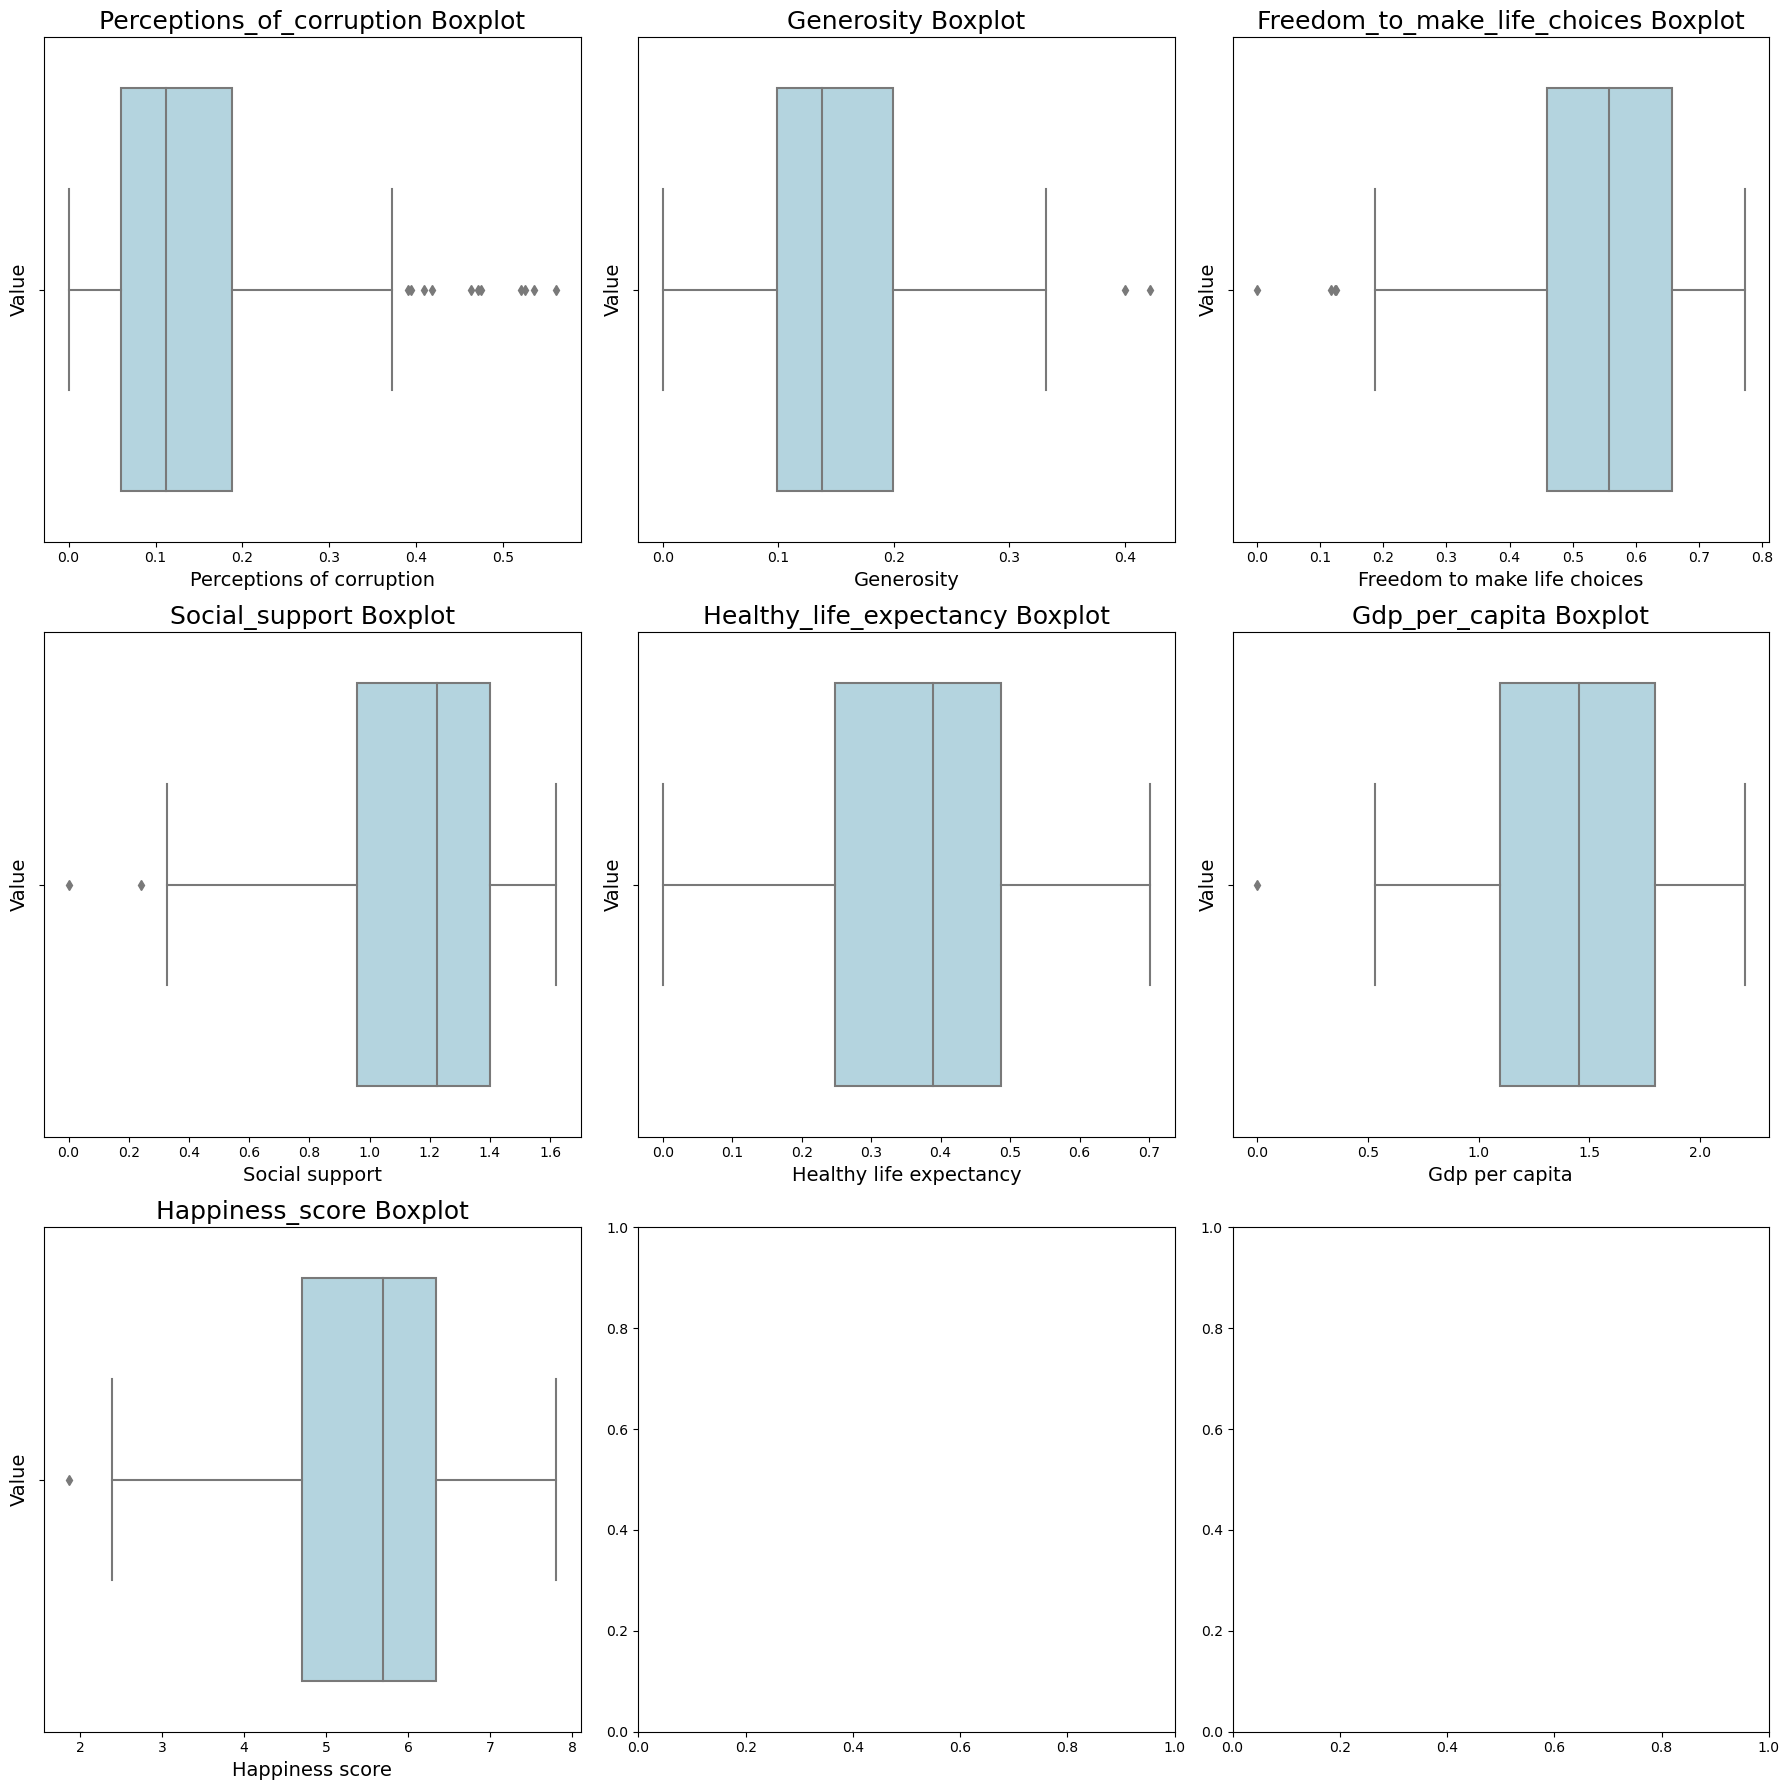

In [30]:
# Define the variables of interest including happiness_score
variables = ['perceptions_of_corruption', 'generosity', 'freedom_to_make_life_choices', 
             'social_support', 'healthy_life_expectancy', 'gdp_per_capita', 'happiness_score']

# Create a subplot grid
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Iterate over the variables and plot the boxplot in each subplot
for i, var in enumerate(variables):
    sns.boxplot(x=df[var], ax=axs[i//3, i%3], color="lightblue", showfliers=True)
    axs[i//3, i%3].set_title(f"{var.capitalize()} Boxplot", fontsize=18)
    axs[i//3, i%3].set_xlabel(f"{var.replace('_', ' ').capitalize()}", fontsize=14)
    axs[i//3, i%3].set_ylabel("Value", fontsize=14)

plt.tight_layout()
plt.show()

    This plot shows the distribuition of all the numeric data.
    The variable that exhibits the highest number of outliers is the one where the distance between the mean and the   
    median is proportionally higher.

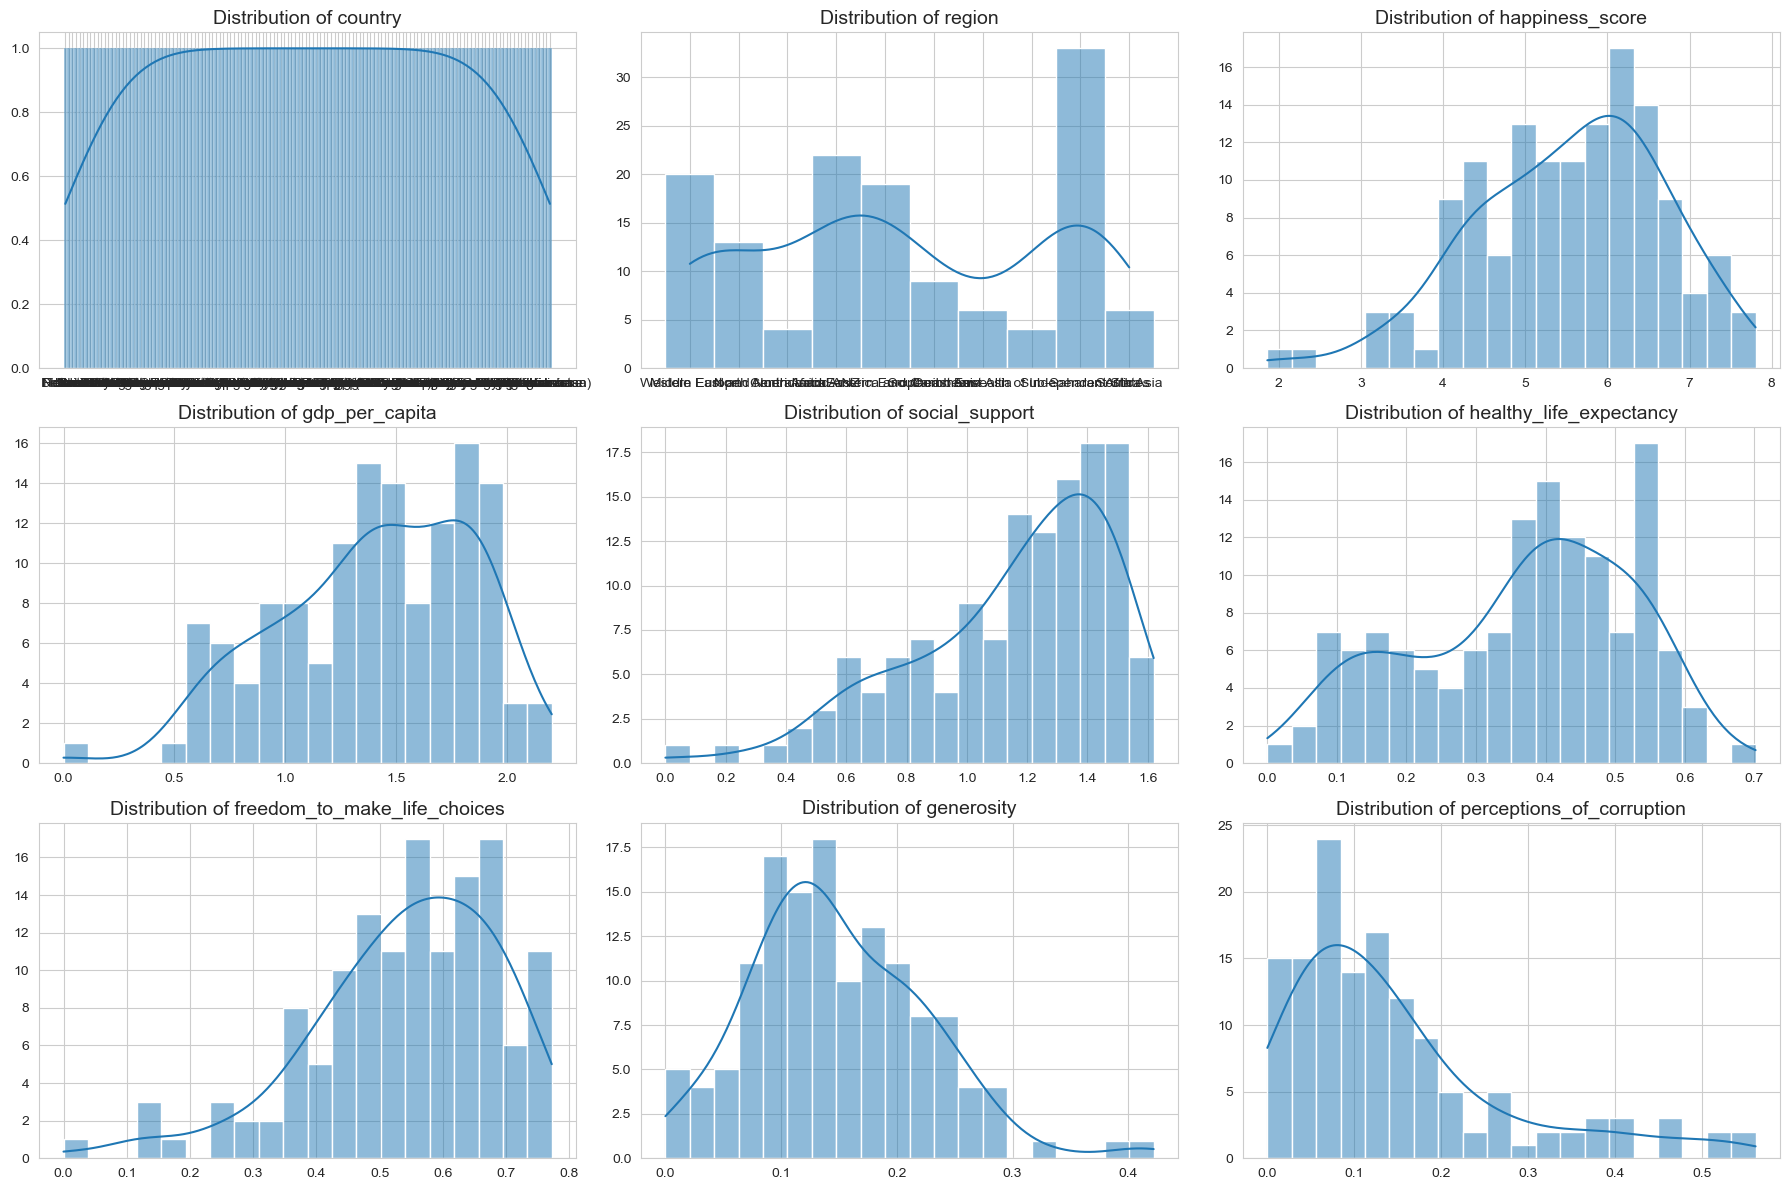

In [31]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution Analysis - Plotting Histograms for key variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove empty subplots
for ax in axes[len(df.columns):]:
    ax.remove()

plt.tight_layout()
plt.show()

    Happiness Score: The distribution appears to be slightly left-skewed, indicating that more countries have happiness scores above the mean. Most countries cluster around the middle to high range of the happiness scale.
    GDP per Capita: This variable shows a broad spread with a peak towards the lower end, suggesting that while many   countries have lower GDP per capita, there's a significant tail extending towards higher values. This indicates    economic disparities across countries.
    Social Support: The distribution is slightly left-skewed, similar to happiness score, implying that most countries report higher levels of social support.
    Healthy Life Expectancy: Shows a somewhat normal distribution but with a slight left skew. It suggests that while  many countries enjoy moderate to high life expectancy, a few countries are significantly lagging behind.
    Freedom to Make Life Choices: The distribution is more uniform but slightly peaks towards the higher end,indicating that many countries enjoy a relatively high level of freedom.
    Generosity: Appears to be right-skewed, with most countries showing lower levels of generosity but with a long tail towards higher generosity scores.
    Perceptions of Corruption: Heavily right-skewed, with many countries perceiving low levels of corruption, but with a long tail indicating that some countries perceive very high levels of corruption.

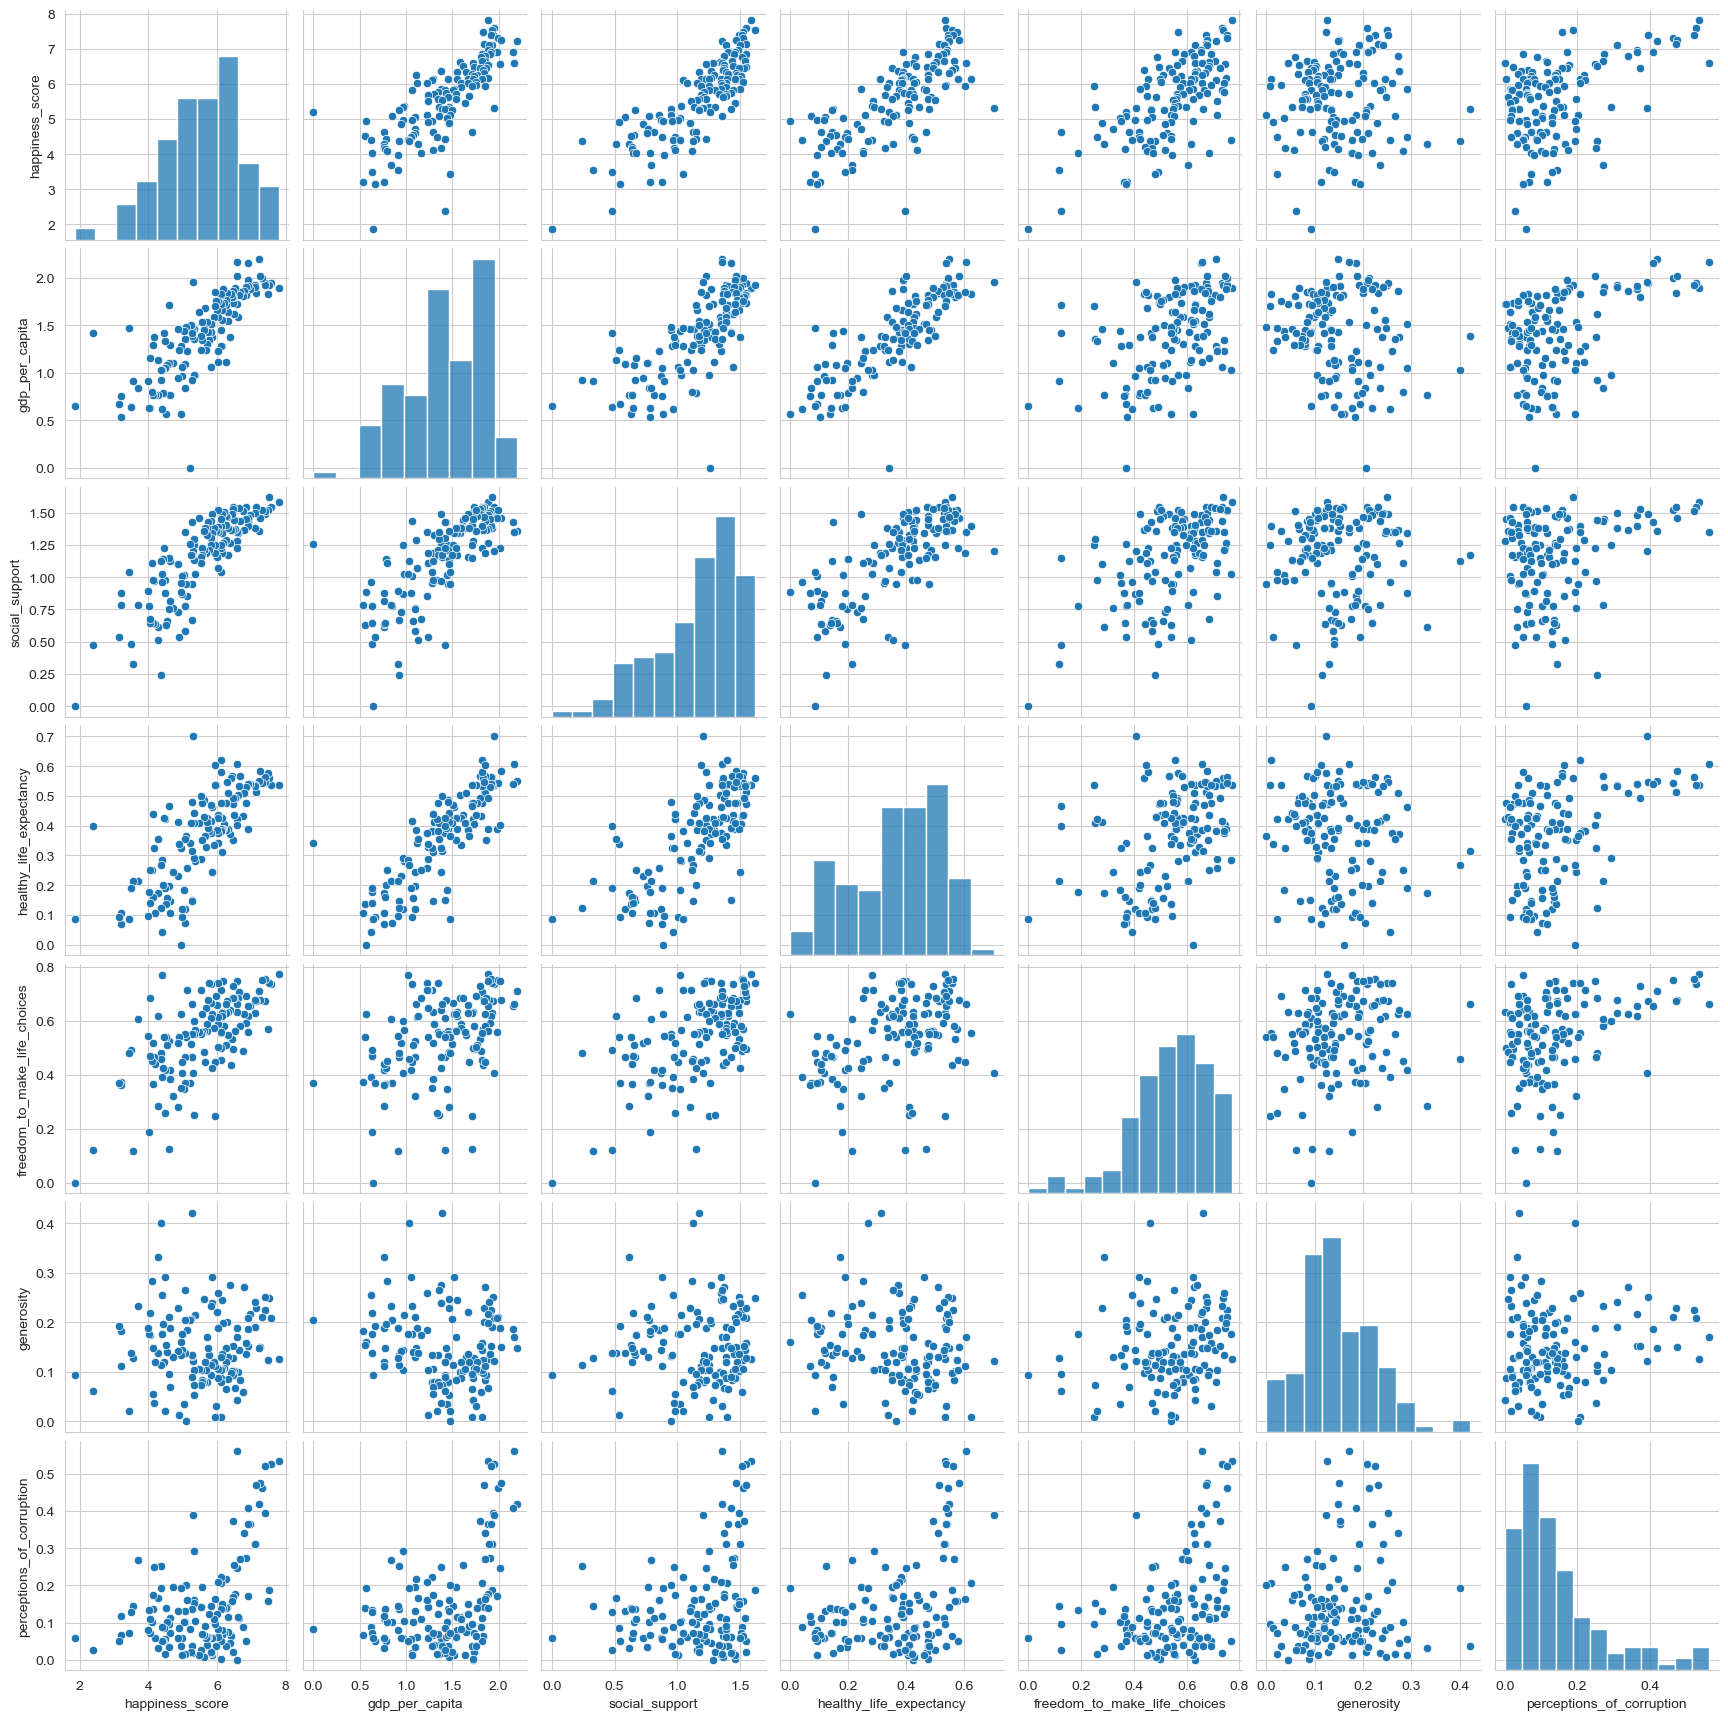

In [32]:
# Selecting only the numerical columns for the pairplot
numerical_data = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                       'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]

# Creating the pairplot
sns.pairplot(numerical_data)
plt.show()

    This plot shows where to start to see correlation and to start undertanding how the variables relate to each other. And as it's seem the variables shows a linear pattern.

### Pearson Correlation 

The Pearson correlation coefficient formula, denoted as r, quantifies the degree of linear relationship between two variables, x and y. It is represented mathematically as follows:

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$


    The denominator is the product of the standard deviations of x and y, obtained by taking the square root of the sum of the squared deviations of x and y from their respective means. The Pearson correlation coefficient r ranges from −1 to 1, where 1 signifies a perfect positive linear relationship, −1 indicates a perfect negative linear relationship, and 0 implies no linear correlation between the variables.

In [33]:
# select all the numeric data of the Dataframe
numeric_data = df.select_dtypes(include='number')
# Plot the correlation between all the numeric variables with 'happiness_score'
correlation_with_happiness = numeric_data.corrwith(numeric_data['happiness_score'])
print("Correlation with Happiness")
print("\n" + "-" * 40)
print(correlation_with_happiness)
print("-" * 40)

Correlation with Happiness

----------------------------------------
happiness_score                 1.000000
gdp_per_capita                  0.783811
social_support                  0.838161
healthy_life_expectancy         0.746699
freedom_to_make_life_choices    0.661944
generosity                      0.039395
perceptions_of_corruption       0.470568
dtype: float64
----------------------------------------


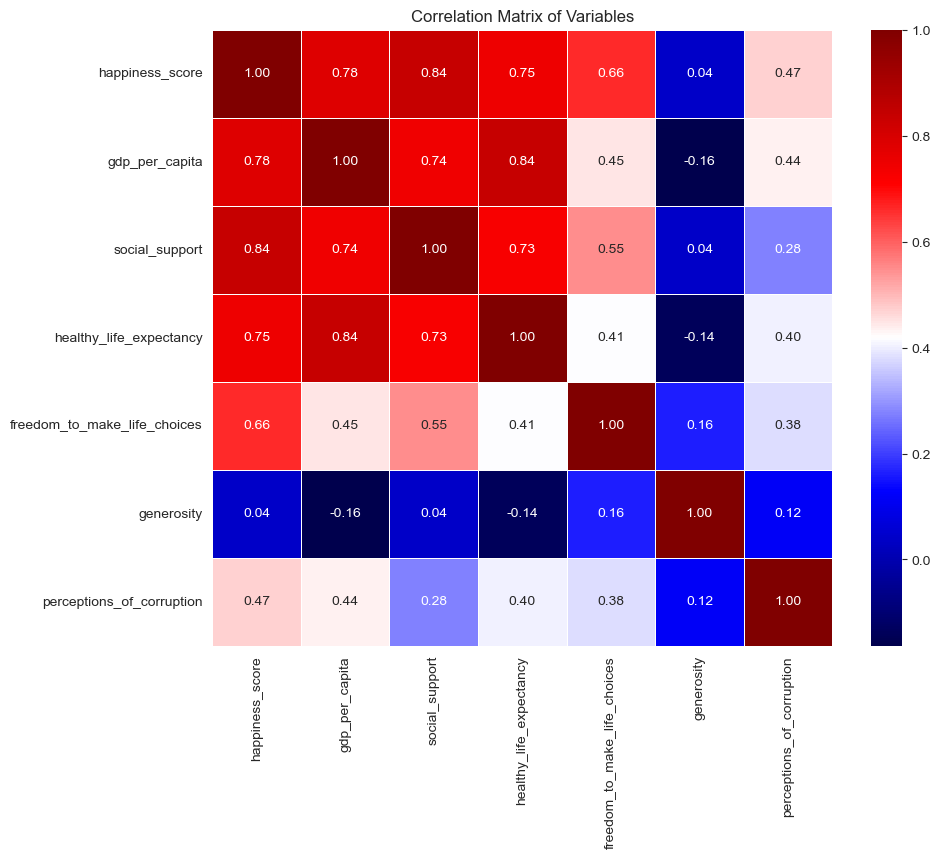

In [34]:
# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

The correlation matrix heatmap provides insights into how different variables are related to each other:

    GDP per Capita and Happiness Score: There is a strong positive correlation, indicating that countries with higher  GDP per capita tend to have higher happiness scores.
    Social Support and Happiness Score: Also shows a strong positive correlation, suggesting that better social support systems are associated with higher happiness levels.
    Healthy Life Expectancy and Happiness Score: This variable is positively correlated with happiness, indicating that countries where people have longer healthy life expectancies tend to be happier.
    Freedom to Make Life Choices and Happiness Score: There is a positive correlation, suggesting that the ability to  make life choices freely contributes to happiness.
    Generosity and Happiness Score: The correlation is positive but weaker compared to other variables, indicating a   less strong but still positive relationship between generosity and happiness.
    Perceptions of Corruption and Happiness Score:Shows a negative correlation, though it's relatively weak, suggesting that higher perceptions of corruption are slightly associated with lower happiness scores.

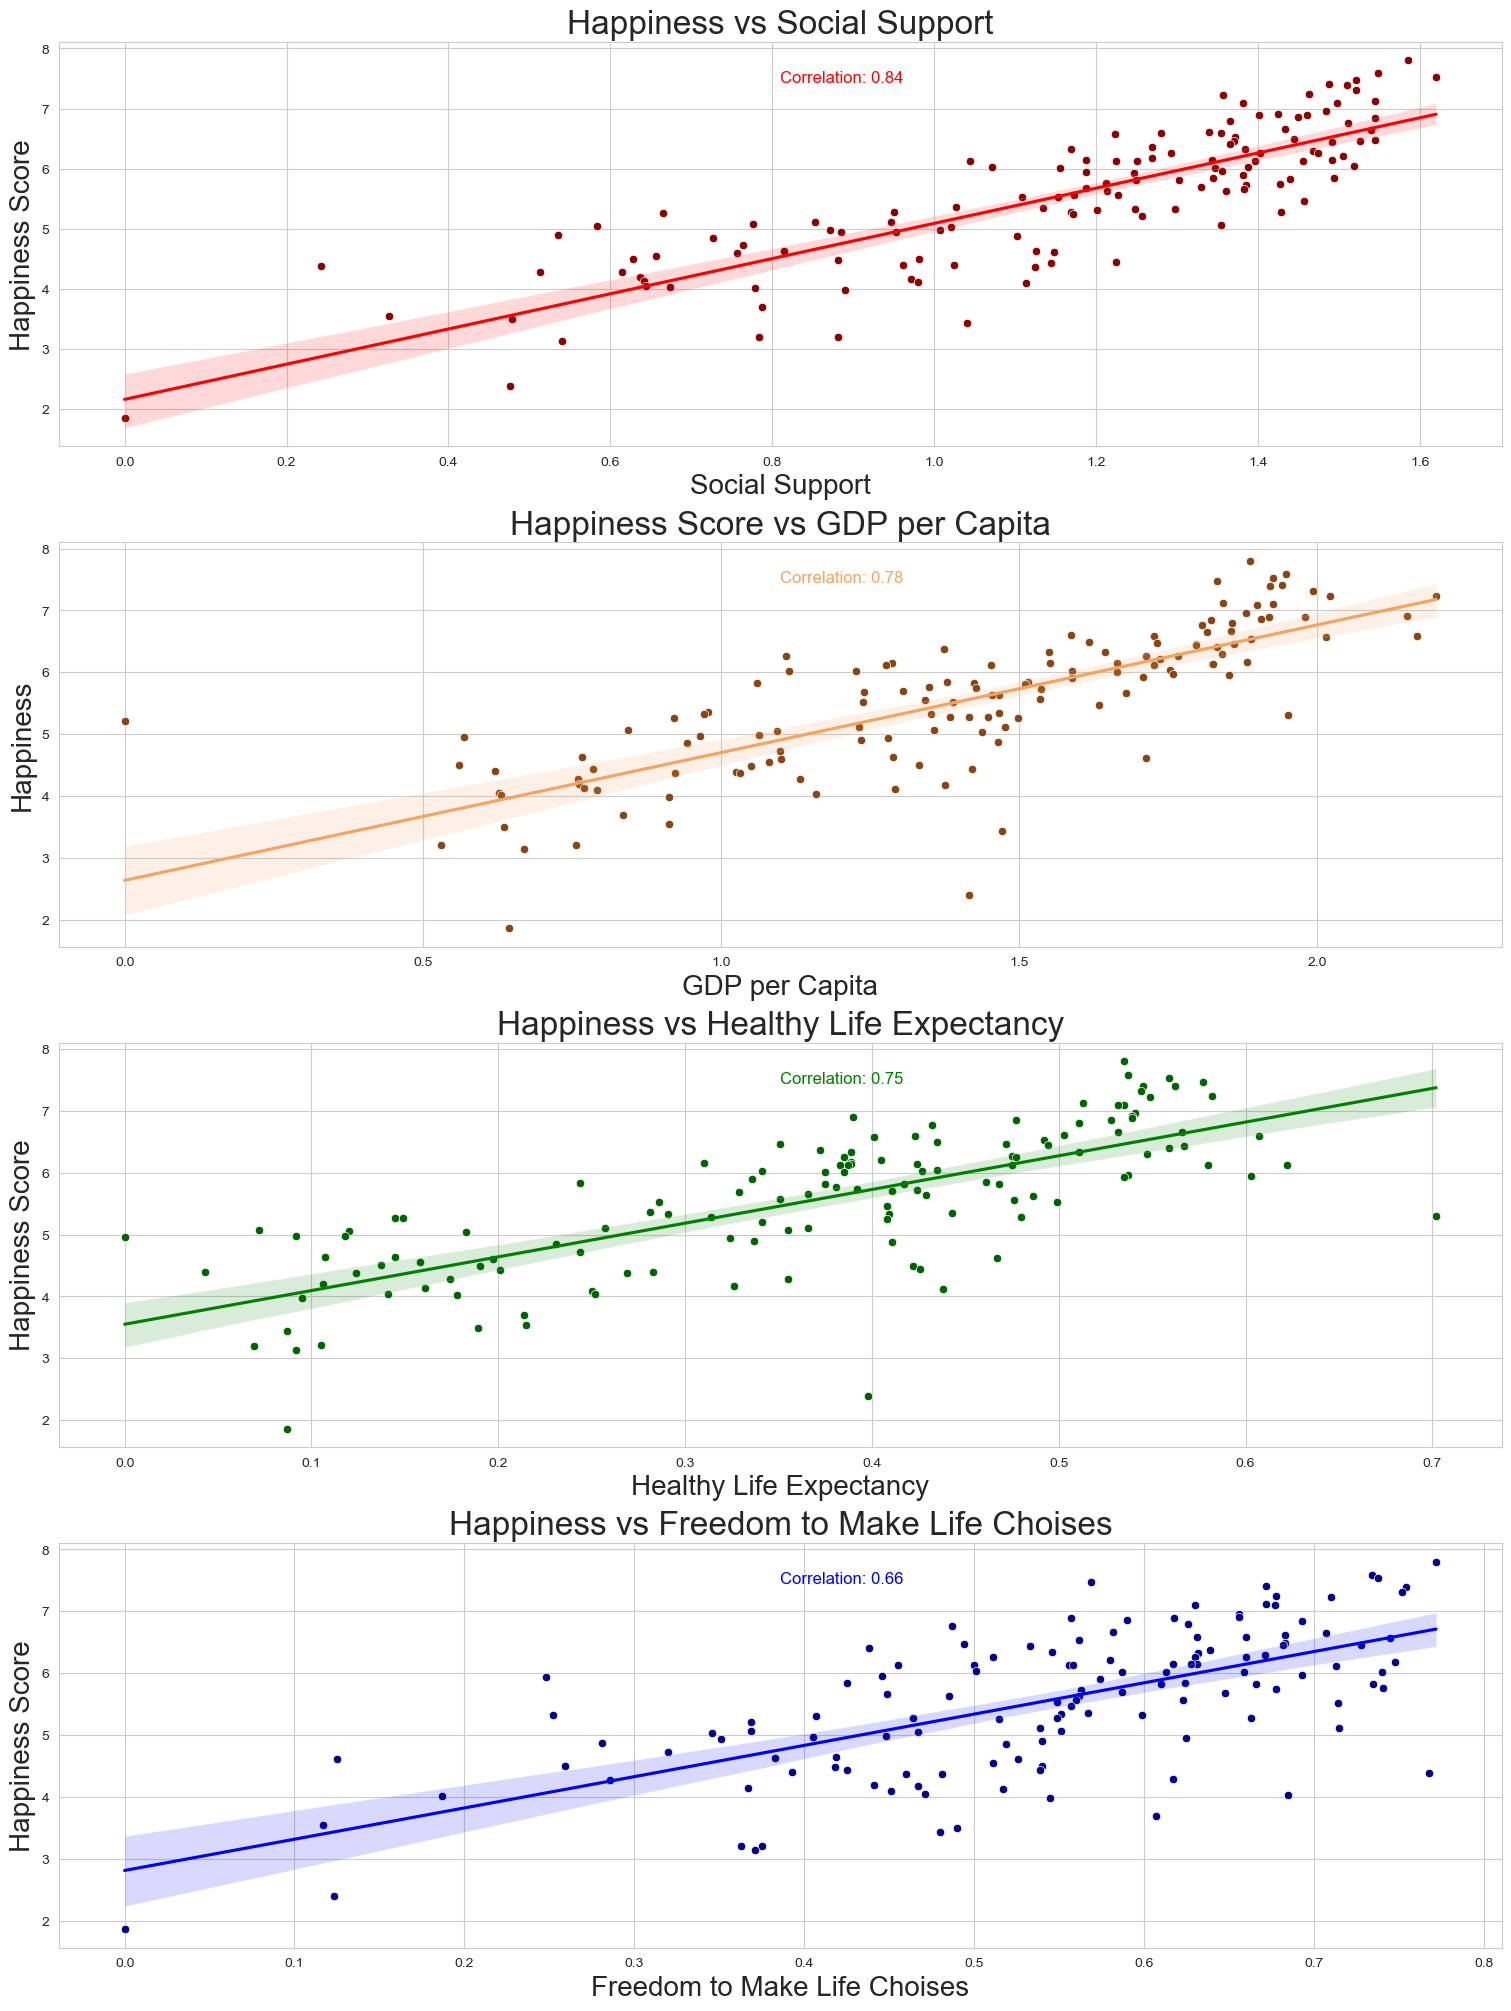

In [35]:
# Creat a plot
fig = plt.figure(constrained_layout=True, figsize=(15, 20))
# Creat a subplot on the mosaic format
mosaic = fig.subplot_mosaic('''
                           A
                           B
                           C
                           D
                           ''')

# Happiness vs Social Support with scatter and regression line
sns.scatterplot(ax=mosaic['A'], x="social_support", y="happiness_score", data=df, color='darkred')
sns.regplot(ax=mosaic['A'], x="social_support", y="happiness_score", data=df, scatter=False, color='red')
mosaic['A'].set_title("Happiness vs Social Support", fontsize=24)
mosaic['A'].set_xlabel("Social Support", fontsize=20)
mosaic['A'].set_ylabel("Happiness Score", fontsize=20)
correlation_generosity = np.corrcoef(df["social_support"], df["happiness_score"])[0, 1]
mosaic['A'].text(0.5, 0.9, f'Correlation: {correlation_generosity:.2f}', fontsize=12, color='red', 
                 transform=mosaic['A'].transAxes)

# Happiness vs GDP per Capita with scatter and regression line
sns.scatterplot(ax=mosaic['B'], x="gdp_per_capita", y="happiness_score", data=df, color='saddlebrown')
sns.regplot(ax=mosaic['B'], x="gdp_per_capita", y="happiness_score", data=df, scatter=False, color='sandybrown')
mosaic['B'].set_title("Happiness Score vs GDP per Capita", fontsize=24)
mosaic['B'].set_xlabel("GDP per Capita", fontsize=20)
mosaic['B'].set_ylabel("Happiness", fontsize=20)
correlation_gdp = np.corrcoef(df["gdp_per_capita"], df["happiness_score"])[0, 1]
mosaic['B'].text(0.5, 0.9, f'Correlation: {correlation_gdp:.2f}', fontsize=12, color='sandybrown', 
                 transform=mosaic['B'].transAxes)

# Happiness vs Healthy Life Expectancy with scatter and regression line
sns.scatterplot(ax=mosaic['C'], x="healthy_life_expectancy", y="happiness_score", data=df, color='darkgreen')
sns.regplot(ax=mosaic['C'], x="healthy_life_expectancy", y="happiness_score", data=df, scatter=False, color='green')
mosaic['C'].set_title("Happiness vs Healthy Life Expectancy", fontsize=24)
mosaic['C'].set_xlabel("Healthy Life Expectancy", fontsize=20)
mosaic['C'].set_ylabel("Happiness Score", fontsize=20)
correlation_healthy = np.corrcoef(df["healthy_life_expectancy"], df["happiness_score"])[0, 1]
mosaic['C'].text(0.5, 0.9, f'Correlation: {correlation_healthy:.2f}', fontsize=12, color='green', 
                 transform=mosaic['C'].transAxes)


# Happiness vs Freedom to Make Life Choises with scatter and regression line
sns.scatterplot(ax=mosaic['D'], x="freedom_to_make_life_choices", y="happiness_score", data=df, color='darkblue')
sns.regplot(ax=mosaic['D'], x="freedom_to_make_life_choices", y="happiness_score", data=df, scatter=False, color='blue')
mosaic['D'].set_title("Happiness vs Freedom to Make Life Choises", fontsize=24)
mosaic['D'].set_xlabel("Freedom to Make Life Choises", fontsize=20)
mosaic['D'].set_ylabel("Happiness Score", fontsize=20)
correlation_freedom = np.corrcoef(df["freedom_to_make_life_choices"], df["happiness_score"])[0, 1]
mosaic['D'].text(0.5, 0.9, f'Correlation: {correlation_freedom:.2f}', fontsize=12, color='blue', 
                 transform=mosaic['D'].transAxes);

    The plot above shows all the strongest correlation varialbes with the Hapiness Score. It appers that the Social    Support, GDP per Capita, and Freedom to Make Life Choises do a strong positive effect in Happiness Score. Showing  this four variables may be the cause of the happiness score variance.
   
    

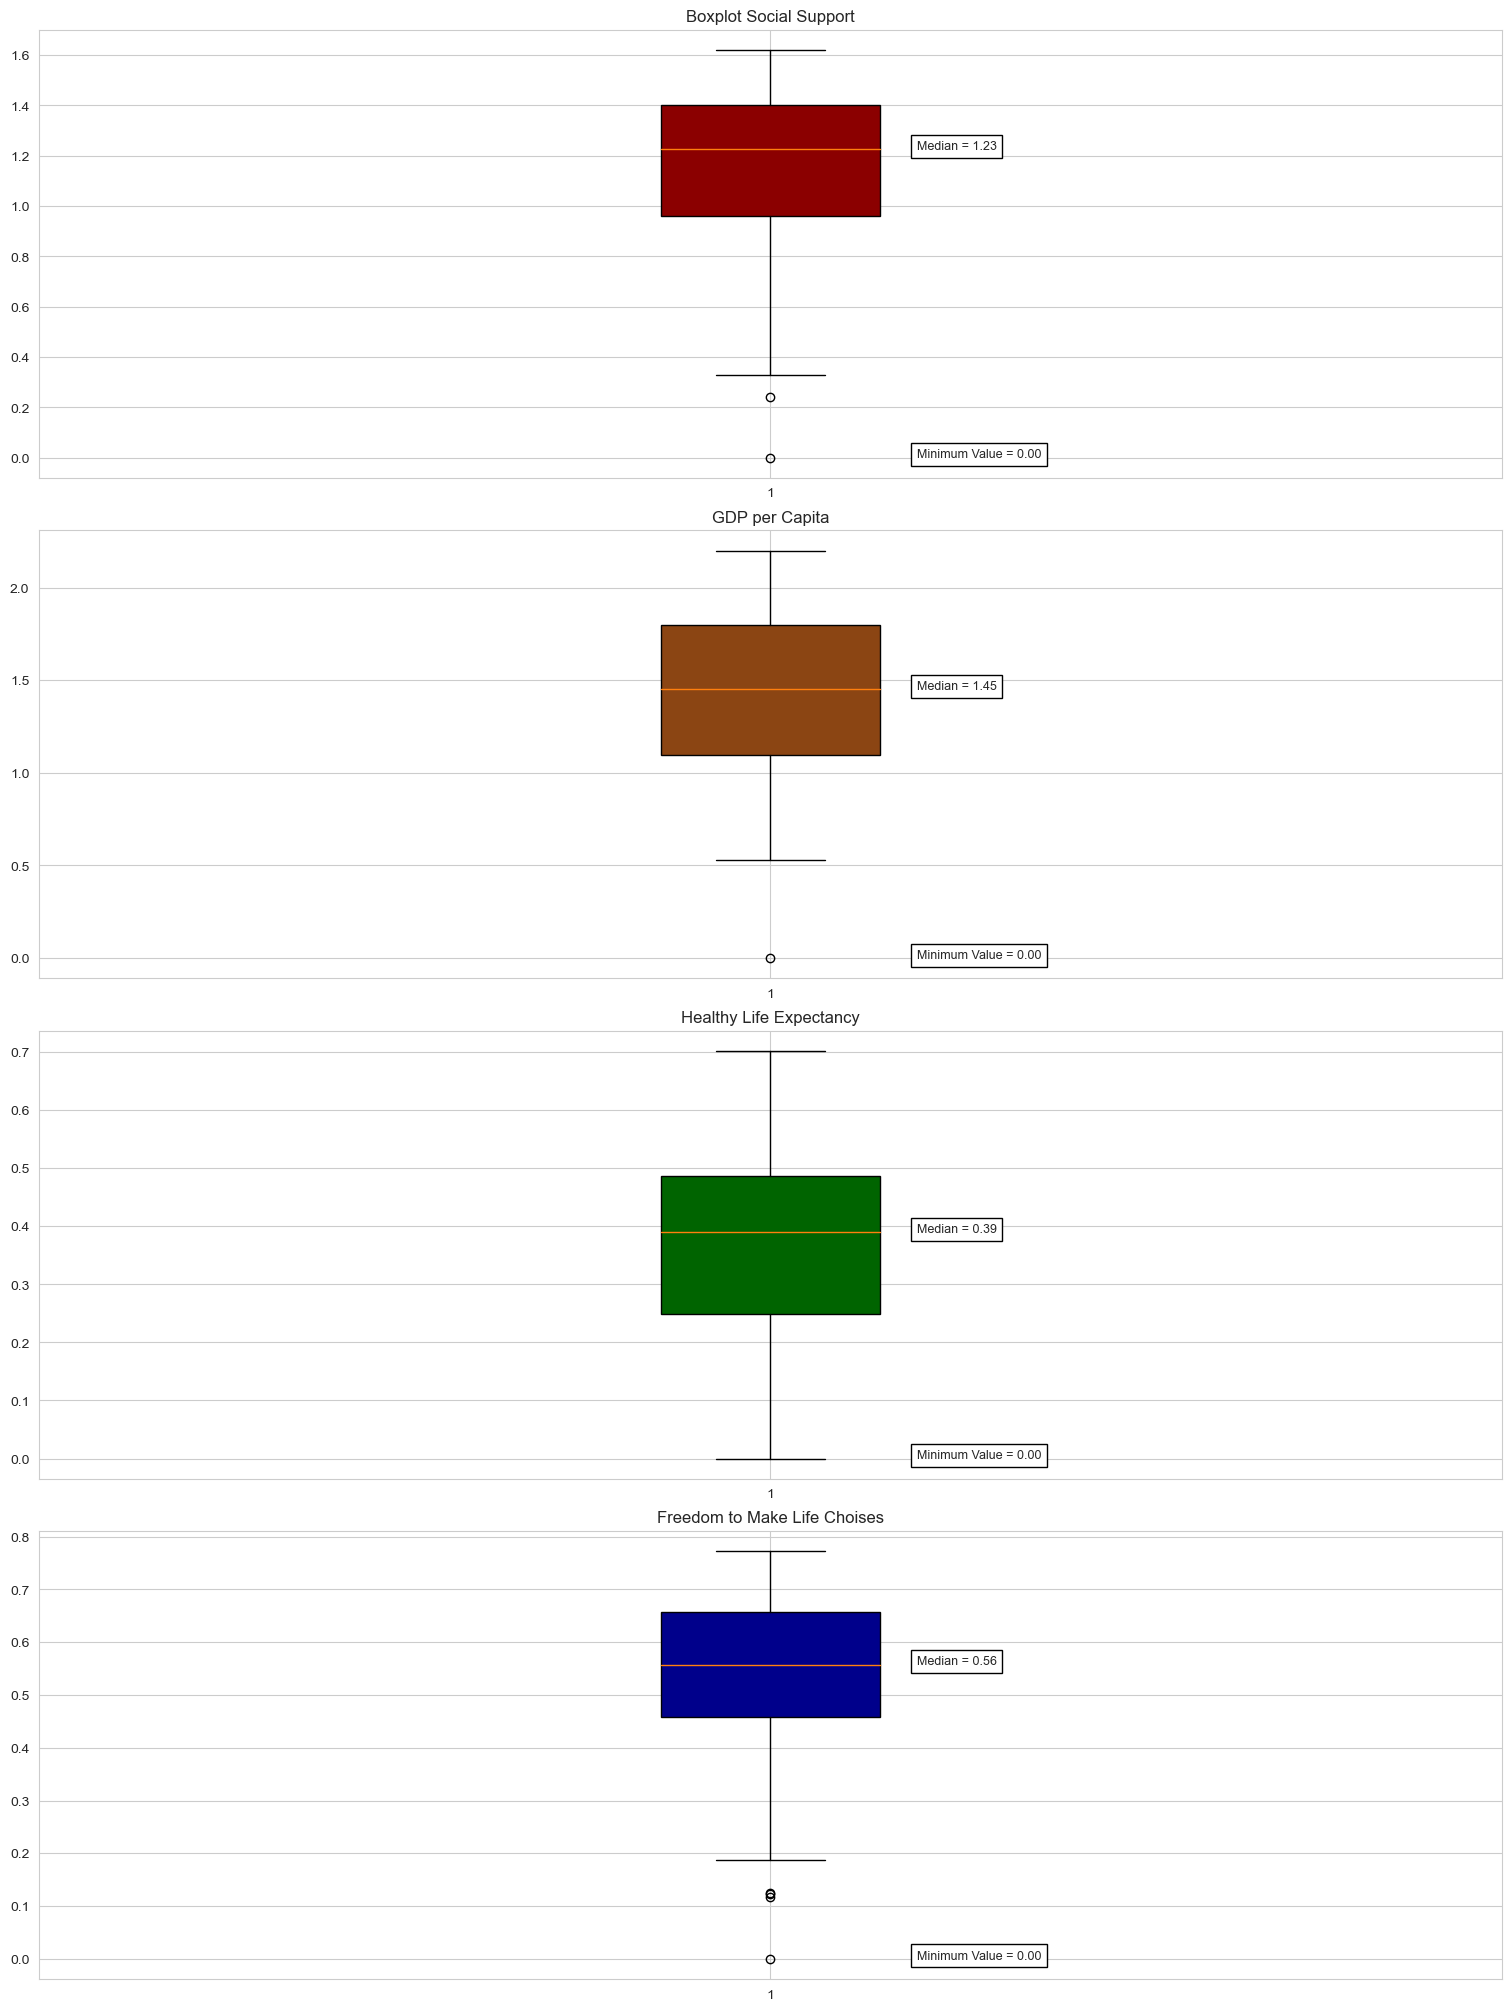

In [36]:
# Creat a plot
fig = plt.figure(constrained_layout=True, figsize=(15, 20))
# Creat a subplot on the mosaic format
mosaic = fig.subplot_mosaic('''
                            A
                            B
                            C
                            D
                            ''')

# Boxplot for social support in subplot 'A'
box1 = mosaic['A'].boxplot(df["social_support"], patch_artist=True)
mosaic['A'].set_title("Boxplot Social Support")

# Set the fill color of the box in subplot 'A' to light green
box1["boxes"][0].set_facecolor("darkred")

# Calculate and annotate the minimum social support value
min_val1 = np.min(df["social_support"])
mosaic['A'].annotate(f'Minimum Value = {min_val1:.2f}',
                    xy=(1, min_val1),
                    xytext=(1.1, min_val1),
                    bbox=dict(facecolor="white", edgecolor="black"),
                    fontsize=9)

# Calculate and annotate the median social support value
median_val1 = np.median(df["social_support"])
mosaic['A'].annotate(f'Median = {median_val1:.2f}',
                    xy=(1, median_val1),
                    xytext=(1.1, median_val1),
                    bbox=dict(facecolor="white", edgecolor="black"),
                    fontsize=9)




# Boxplot for social support in subplot 'B'
box2 = mosaic['B'].boxplot(df["gdp_per_capita"], patch_artist=True)
mosaic['B'].set_title("GDP per Capita")

# Set the fill color of the box in subplot 'A' to light green
box2["boxes"][0].set_facecolor("saddlebrown")

# Calculate and annotate the minimum social support value
min_val2 = np.min(df["gdp_per_capita"])
mosaic['B'].annotate(f'Minimum Value = {min_val2:.2f}',
                    xy=(1, min_val2),
                    xytext=(1.1, min_val2),
                    bbox=dict(facecolor="white", edgecolor="black"),
                    fontsize=9)

# Calculate and annotate the median social support value
median_val2 = np.median(df["gdp_per_capita"])
mosaic['B'].annotate(f'Median = {median_val2:.2f}',
                    xy=(1, median_val2),
                    xytext=(1.1, median_val2),
                    bbox=dict(facecolor="white", edgecolor="black"),
                    fontsize=9)


# Boxplot for social support in subplot 'C'
box3 = mosaic['C'].boxplot(df["healthy_life_expectancy"], patch_artist=True)
mosaic['C'].set_title("Healthy Life Expectancy")

# Set the fill color of the box in subplot 'A' to light green
box3["boxes"][0].set_facecolor("darkgreen")

# Calculate and annotate the minimum social support value
min_val3 = np.min(df["healthy_life_expectancy"])
mosaic['C'].annotate(f'Minimum Value = {min_val3:.2f}',
                    xy=(1, min_val3),
                    xytext=(1.1, min_val3),
                    bbox=dict(facecolor="white", edgecolor="black"),
                    fontsize=9)

# Calculate and annotate the median social support value
median_val3 = np.median(df["healthy_life_expectancy"])
mosaic['C'].annotate(f'Median = {median_val3:.2f}',
                    xy=(1, median_val3),
                    xytext=(1.1, median_val3),
                    bbox=dict(facecolor="white", edgecolor="black"),
                    fontsize=9)




# Boxplot for social support in subplot 'C'
box4 = mosaic['D'].boxplot(df["freedom_to_make_life_choices"], patch_artist=True)
mosaic['D'].set_title("Freedom to Make Life Choises")

# Set the fill color of the box in subplot 'A' to light green
box4["boxes"][0].set_facecolor("darkblue")

# Calculate and annotate the minimum social support value
min_val4 = np.min(df["freedom_to_make_life_choices"])
mosaic['D'].annotate(f'Minimum Value = {min_val4:.2f}',
                    xy=(1, min_val4),
                    xytext=(1.1, min_val4),
                    bbox=dict(facecolor="white", edgecolor="black"),
                    fontsize=9)

# Calculate and annotate the median social support value
median_val4 = np.median(df["freedom_to_make_life_choices"])
mosaic['D'].annotate(f'Median = {median_val4:.2f}',
                    xy=(1, median_val4),
                    xytext=(1.1, median_val4),
                    bbox=dict(facecolor="white", edgecolor="black"),
                    fontsize=9)

plt.show()

    More of distribution, but now with the four positively strongest variables. 

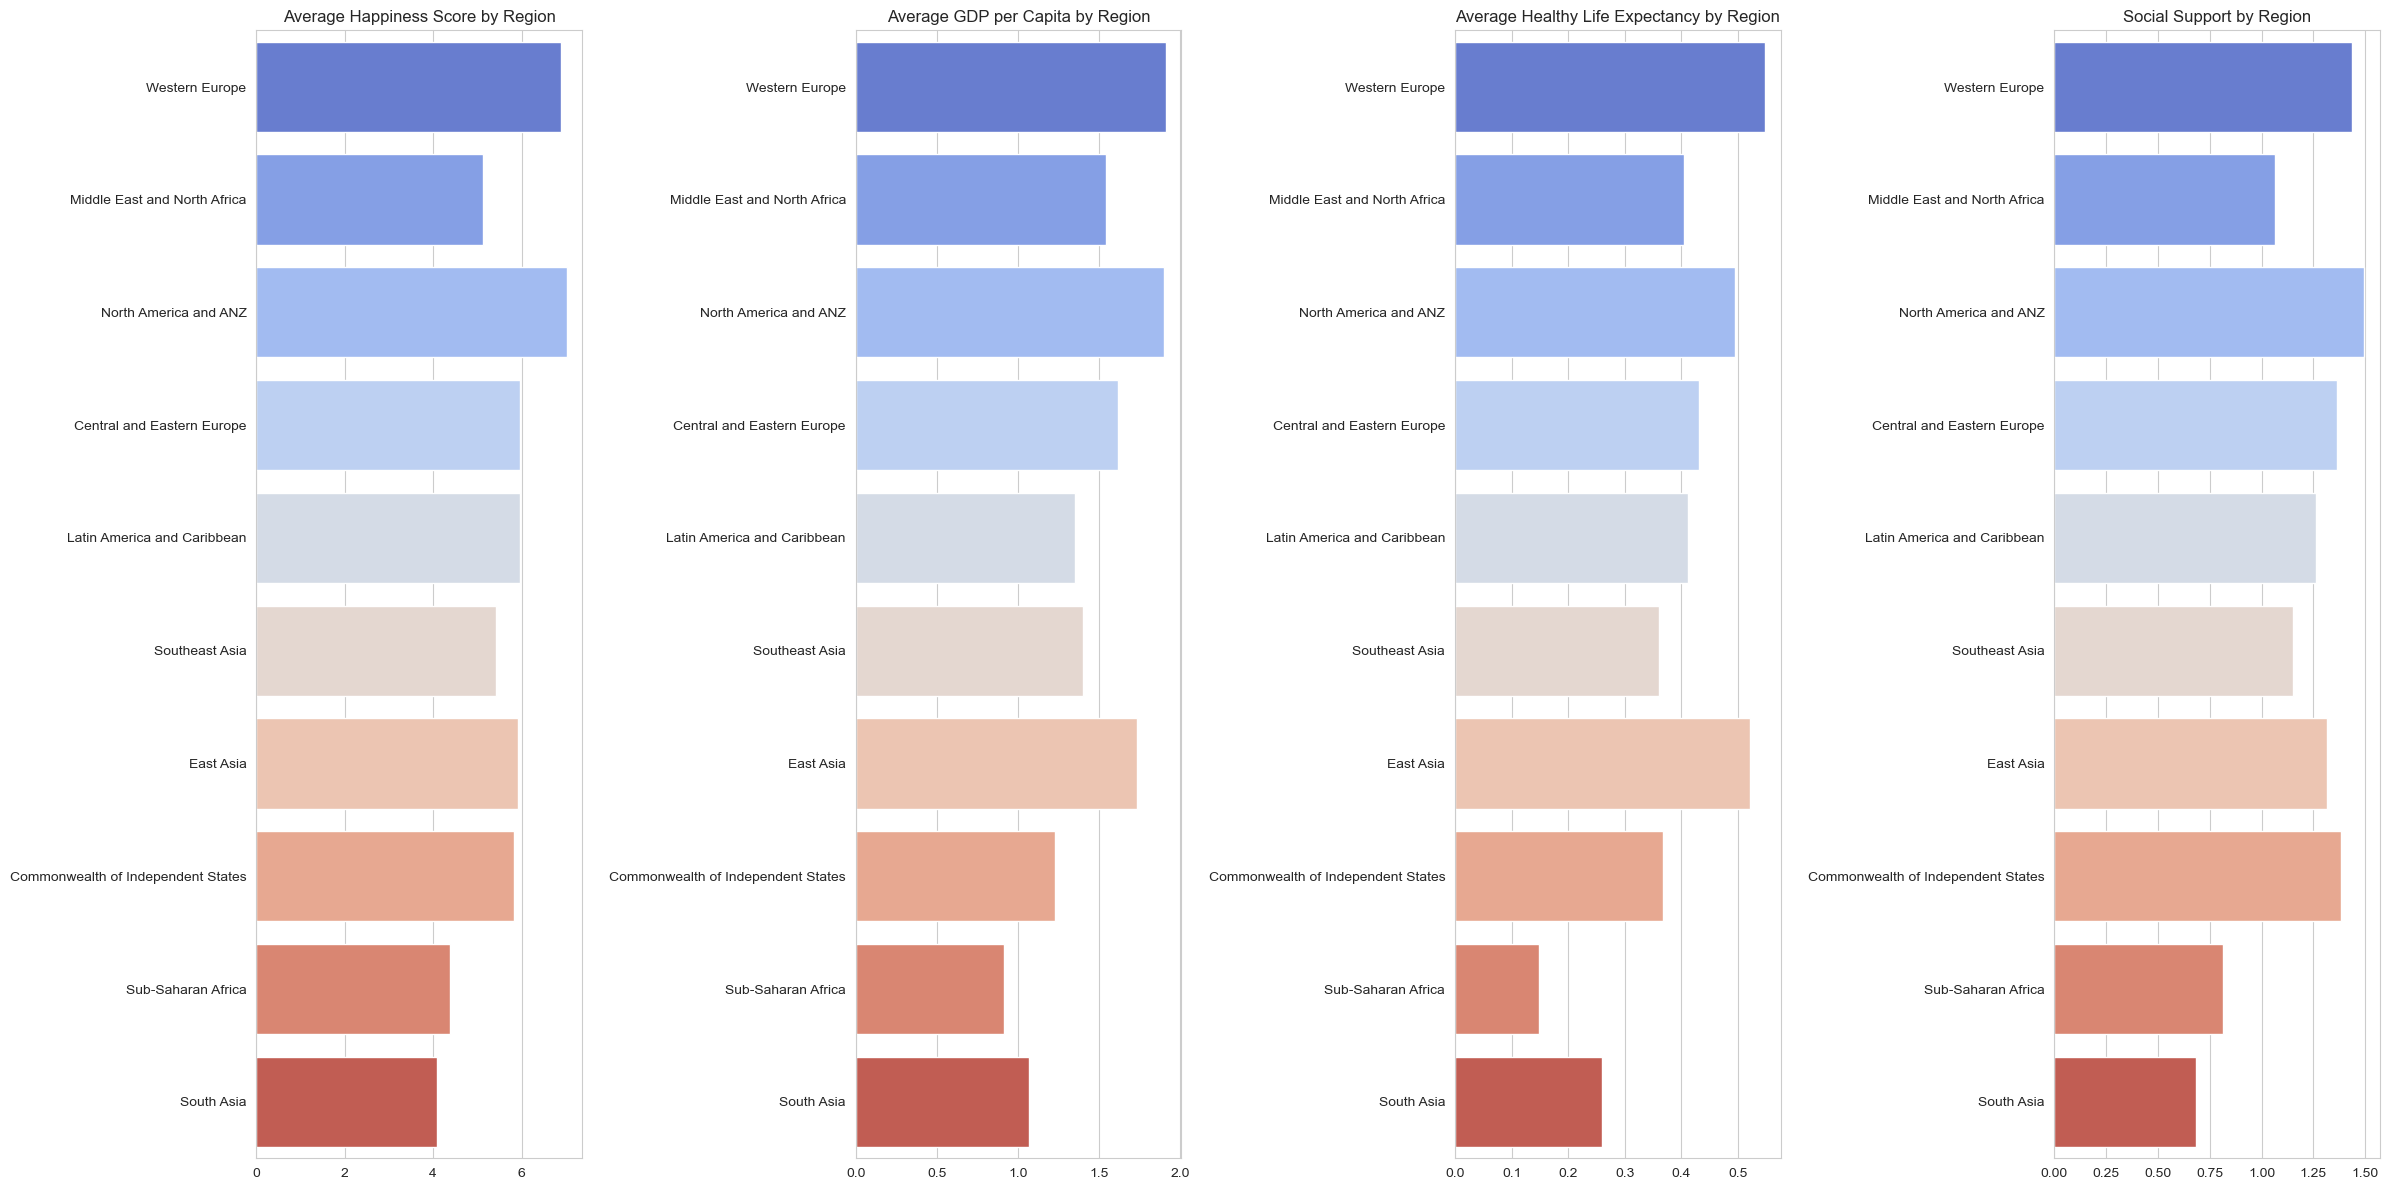

In [37]:
# Comparative Analysis by Region - Focusing on Happiness Score, GDP per Capita, and Healthy Life Expectancy
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 12))

# Happiness Score by Region
sns.barplot(x='happiness_score', y='region', data=df, ax=axes[0], errorbar=None, palette="coolwarm")
axes[0].set_title('Average Happiness Score by Region')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# GDP per Capita by Region
sns.barplot(x='gdp_per_capita', y='region', data=df, ax=axes[1], errorbar=None, palette="coolwarm")
axes[1].set_title('Average GDP per Capita by Region')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Healthy Life Expectancy by Region
sns.barplot(x='healthy_life_expectancy', y='region', data=df, ax=axes[2], errorbar=None, palette="coolwarm")
axes[2].set_title('Average Healthy Life Expectancy by Region')
axes[2].set_xlabel('')
axes[2].set_ylabel('')

# Social Support
sns.barplot(x="social_support", y="region", data=df, ax=axes[3], errorbar=None, palette="coolwarm")
axes[3].set_title("Social Support by Region")
axes[3].set_xlabel('')
axes[3].set_ylabel('')

plt.tight_layout()
plt.show()

    Happiness by Region: There are clear regional differences in happiness scores. Some regions, like North America and Australia and New Zeland (ANZ) and Western Europe, shows the most happiness Score. This reinforces the correlation analysis that suggested a strong link between economic prosperity and happiness.

    GDP per Capita by Region: The economic disparities across regions are evident. Regions with higher GDP per capita are likely to have better infrastructure, healthcare, education, and other factors contributing to higher happiness scores. On this variable the East Asia is closer to North America & ANZ and Western Europe. 

    Healthy Life Expectancy by Region: Similar to happiness score and GDP per capita, healthy life expectancy varies   significantly across regions. Regions with higher GDP and happiness scores also tend to have longer healthy life   expectancies, but the East Asia shows a pretty high level of Healthy Life Expectancy, losing only agaist Western   Europe.
    
    Social Support by Region: The most "democratic", Social Support is high in all the economic strongiest regions, but the Commonwealth of Independent States reveals a high Social Support even with a Small GDP per Capita.

In [38]:
# Creat the plot
fig = px.choropleth(df,
                    locations="country",
                    locationmode="country names",
                    color="happiness_score",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.RdBu,
                    title="Global Happiness Index", 
                   )

# Adjust the layout
fig.update_layout(
    font=dict(family="Arial, sans-serif", size=12), # Ajusta a fonte e o tamanho
    geo=dict(showframe=True, showcoastlines=True, projection_type='natural earth'),
    title=dict(x=0.5, xanchor='center', font=dict(size=20)), # Centraliza e ajusta o tamanho do título
    coloraxis_colorbar=dict(title="Hapiness Index", # Personaliza a legenda da escala de cores
                             titleside="right",
                             tickmode="array",
                             tickvals=[df.happiness_score.min(), df.happiness_score.max()],
                             ticktext=["Less Happy", "More Happy"],
                             ticks="outside")
)

fig.show()

    Here it's shows on a interactive global view of the Hapinesse Index.

<h2 align='center'> Statistical Inference </h2>

### Ordinary Least Squares
    It is a statistical method used to estimate the parameters of a linear regression model. This method seeks to minimize the sum of the squares of the differences between the observed values of the dependent variable and those predicted by the linear model.
Principles of OLS Regression

Multiple Linear Model: OLS applies to models where the relationship between the dependent variable and one or more independent variables is linear. The model can be expressed as:
$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \varepsilon
$$



where:

```
Y is the dependent variable.

X1, X2, ..., Xn are the independent variables.
β0 is the intercept.

β1, β2, ..., βn are the coefficients of the independent variables, representing the expected change in Y for a unit change in Xi, keeping all other variables constant.

ε is the error term, representing the difference between the observed values and the values predicted by the model.

```


Minimization of the Sum of Squared Residuals: The objective of OLS regression is to find the values of β that minimize the sum of the squared residuals (differences between the observed and predicted values). Mathematically, this is expressed as:

$$
\min \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$


where Yi are the observed values of the dependent variable, and Y^i are the values predicted by the model.

### Hands on OLS
   
    Using all the variables. The variable "region" is treated as categorical, so is used the "C(region)"

In [39]:
formula = 'happiness_score ~ C(region) + gdp_per_capita + social_support + healthy_life_expectancy + freedom_to_make_life_choices + generosity + perceptions_of_corruption'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     47.49
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           3.61e-43
Time:                        17:37:08   Log-Likelihood:                -78.934
No. Observations:                 136   AIC:                             189.9
Df Residuals:                     120   BIC:                             236.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

#### Explaning The Model Results

#### OLS (Ordinary Least Squares) regression provides a lot of information about the relationship between happiness score and various independent variables, including region, GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. Let's interpret the main parts of the result:

##### R-squared (R²)

    R-squared: 0.856 means that 85.6% of the variability in happiness score are explained by the included independent  variables. This is quite high, suggesting the model does a good job at explaining happiness scores.

##### Model Adjustment

    Adj. R-squared: 0.838 adjusts the R² based on the number of predictors in the model, giving a more accurate measure for models with multiple variables. Still, it's quite high, reinforcing the model's effectiveness.

##### F-statistic and Prob (F-statistic)

    F-statistic: 47.49 and Prob (F-statistic): 3.61e-43 test the null hypothesis that all regression coefficients are  equal to zero (meaning none of the independent variables have an effect). A high F value and a very small p-value (equal to or less than 0.05) reject this null hypothesis, indicating at least one of the independent variables     significantly affects happiness scores.

##### Coefficients

    Intercept: 1.8751 is the expected happiness score when all the independent variables are zero. This value acts as a starting point for model predictions.
    The coefficients for each variable show the expected impact on happiness score for a one-unit increase in that     variable, holding all others constant.

        gdp_per_capita (0.6991, p=0.002) and social_support (1.2080, p=0.000) have significant positive effects on     happiness scores, meaning increases in these variables are associated with increases in happiness.
    freedom_to_make_life_choices (1.8374, p=0.000) also shows a significant positive effect, suggesting a strong impact on happiness.
    Regional variables have different coefficients, but many are not statistically significant at a significance level (e.g., p < 0.05), indicating the region may not have a consistent effect on happiness scores after controlling for other variables.

##### P-value

    The p-value tests the null hypothesis that the coefficient is equal to zero (no effect). Values below 0.05 are     generally considered statistically significant, indicating strong evidence against the null hypothesis.

    Variables like gdp_per_capita, social_support, and freedom_to_make_life_choices have significant p-values, while   others like healthy_life_expectancy and generosity have higher p-values, suggesting they might not have a statistically significant effect on happiness scores, given the presence of other variables in the model.

##### Residuals Evaluation

    Omnibus, Prob(Omnibus), Skew, Kurtosis, Durbin-Watson, Jarque-Bera (JB),Prob(JB) are tests and measures that assess the normality and independence of residuals. For example, an Omnibus test with a low p-value (as the case) suggests the residuals don't follow a normal distribution. We want residuals to be normally distributed and independent,    which may not be entirely the case here, indicating the need for further investigation or model adjustment.

    Using only the numeric variables

In [40]:
formula = 'happiness_score ~  gdp_per_capita + social_support + healthy_life_expectancy + freedom_to_make_life_choices + generosity + perceptions_of_corruption'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     103.5
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           7.27e-47
Time:                        17:37:12   Log-Likelihood:                -90.918
No. Observations:                 136   AIC:                             195.8
Df Residuals:                     129   BIC:                             216.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [41]:
formula = 'happiness_score ~  gdp_per_capita'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     213.5
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.64e-29
Time:                        17:37:15   Log-Likelihood:                -145.84
No. Observations:                 136   AIC:                             295.7
Df Residuals:                     134   BIC:                             301.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6362      0.208     12.

In [42]:
formula = 'happiness_score ~  social_support'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     316.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.32e-37
Time:                        17:37:17   Log-Likelihood:                -128.19
No. Observations:                 136   AIC:                             260.4
Df Residuals:                     134   BIC:                             266.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1635      0.197     10.

In [43]:
formula = 'happiness_score ~  healthy_life_expectancy'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.71e-25
Time:                        17:37:20   Log-Likelihood:                -155.18
No. Observations:                 136   AIC:                             314.4
Df Residuals:                     134   BIC:                             320.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [44]:
formula = 'happiness_score ~  freedom_to_make_life_choices'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.72e-18
Time:                        17:37:23   Log-Likelihood:                -171.43
No. Observations:                 136   AIC:                             346.9
Df Residuals:                     134   BIC:                             352.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [45]:
formula = 'happiness_score ~  generosity'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2083
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.649
Time:                        17:37:26   Log-Likelihood:                -210.53
No. Observations:                 136   AIC:                             425.1
Df Residuals:                     134   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4561      0.217     25.136      0.0

In [46]:
formula = 'happiness_score ~ perceptions_of_corruption'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     38.11
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           7.43e-09
Time:                        17:37:31   Log-Likelihood:                -193.61
No. Observations:                 136   AIC:                             391.2
Df Residuals:                     134   BIC:                             397.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [47]:
formula = 'happiness_score ~  gdp_per_capita + social_support + healthy_life_expectancy + freedom_to_make_life_choices'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.11e-47
Time:                        17:37:34   Log-Likelihood:                -95.598
No. Observations:                 136   AIC:                             201.2
Df Residuals:                     131   BIC:                             215.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [48]:
formula = 'happiness_score ~  C(region)'

model = ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     25.24
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.69e-24
Time:                        17:37:37   Log-Likelihood:                -140.55
No. Observations:                 136   AIC:                             301.1
Df Residuals:                     126   BIC:                             330.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

<h3 align='center'> Conclusion of OLS </h3> 

The OLS does not Shows the Causal, but we can tell that high Social Support, GDP per Capita, Healthy life Expectancy, and Freedom to make life Choices are correlated to a higher Happiness Score

    This analysis suggests an approach to the development of public policies, where economic, physical health, social  support, and individual freedom are considered together in promoting national happiness. This perspective can guide governments, organizations, and individuals in implementing more effective strategies for building happier and more resilient societies.

<h2 align='center'> Causal Inference </h2>

### Dowhy

![dowhy](https://www.microsoft.com/en-us/research/uploads/prod/2018/08/Figure1_DoWhy.-Separating-indentification-and-estimation-of-casual-effect.png)

#### Modeling

The first step in causal inference is to model your problem, typically using a Directed Acyclic Graph (DAG). A DAG helps in visualizing the causal relationships among variables.

    Notation: Let's denote treatment by T, outcome by Y, and any confounders (variables that influence both treatment and outcome) by X or W.
$$
X \rightarrow T \rightarrow Y\
$$

#### Identification

Once you have a model, the next step is identifying the causal effect you're interested in estimating. This usually involves assumptions like ignorability, which states that there are no unmeasured confounders. The Average Treatment Effect (ATE) is a common target for identification.

    ATE Definition: The average difference in outcome if all units had received the treatment versus if none had.
    
$$
\text{ATE} = E[Y| do(T=1)] - E[Y| do(T=0)] 
$$

Here, E[ ] denotes the expected value, and do( ) represents a do-operation, indicating intervention by setting T to a particular value.

#### Estimate
After identifying the causal effect, the next step is to estimate it from the data. This involves statistical methods that adjust for the confounders to isolate the effect of the treatment from other influences.

denote the propensity score, then the ATE can be estimated by matching or weighting observations by

$$
e(X) = P(T=1|X)  (e(X).
$$

#### Refutation

The final step in the causal inference process is to test the robustness of your estimated effect. DoWhy offers several refutation methods, like adding a random common cause or replacing the treatment with a random (placebo) treatment.

    Placebo Treatment Test: If replacing the actual treatment with a placebo does not significantly change the outcome, it raises questions about the causal relationship.

In [49]:
# Defining the variables for the analysis
treatment_variables = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                       'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
interest_variable = 'happiness_score'

# This loop will create and estimate a causal model for each treatment variable separately
for treatment in treatment_variables:
    # Define the control variables as all other variables except the current treatment variable
    control_variables = [var for var in treatment_variables if var != treatment]
    
    # Creating the causal model for the current treatment variable
    model = CausalModel(data=df,
                        treatment=treatment,
                        outcome=interest_variable,
                        common_causes=control_variables)

    # Identifying the causal effect using the backdoor criterion
    identified_effect = model.identify_effect()

    # Estimating the causal effect using linear regression
    causal_estimate = model.estimate_effect(identified_effect,
                                            method_name="backdoor.linear_regression")
    
    # Printing the causal effect estimate
    print(f"Causal Effect of {treatment} on {interest_variable}:")
    print(causal_estimate)
    print("\n---\n")

Causal Effect of gdp_per_capita on happiness_score:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(E[happiness_score|social_support,healthy_life_expectancy,fre
d[gdp_per_capita]                                                             

                                                                
edom_to_make_life_choices,perceptions_of_corruption,generosity])
                                                                
Estimand assumption 1, Unconfoundedness: If U→{gdp_per_capita} and U→happiness_score then P(happiness_score|gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity,U) = P(happiness_score|gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruptio

In [51]:
# Defining the variables
treatment_variables = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                       'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
interest_variable = 'happiness_score'
control_variables = treatment_variables  # Since we iterate over treatment variables, controls will adjust accordingly

# Placeholder for storing results
causal_effects = {}

# Loop over each treatment variable to estimate its causal effect on the interest variable
for treatment in treatment_variables:
    # Adjust the control variables for the current treatment variable
    current_controls = [var for var in control_variables if var != treatment]
    
    # Creating the causal model for the current iteration
    model = CausalModel(data=df,
                        treatment=treatment,
                        outcome=interest_variable,
                        common_causes=current_controls)
    
    # Identify the causal effect
    identified_effect = model.identify_effect()
    
    # Estimate the causal effect
    causal_estimate = model.estimate_effect(identified_effect,
                                            method_name="backdoor.linear_regression")
    
    # Store the estimated effect
    causal_effects[treatment] = causal_estimate.value

# Display the estimated causal effects
for treatment, effect in causal_effects.items():
    print(f"Estimated causal effect of {treatment} on {interest_variable}: {effect}")

Estimated causal effect of gdp_per_capita on happiness_score: 0.5657870036115433
Estimated causal effect of social_support on happiness_score: 1.5545851510351256
Estimated causal effect of healthy_life_expectancy on happiness_score: 0.7347292813862323
Estimated causal effect of freedom_to_make_life_choices on happiness_score: 1.756856732005768
Estimated causal effect of generosity on happiness_score: 0.27082274446057664
Estimated causal effect of perceptions_of_corruption on happiness_score: 1.1145355833757185


GDP per Capita (0.565): 

    This suggests that, all else being equal, a unit increase in GDP per capita is associated with an increase of      approximately 0.565 in the happiness score. This indicates a positive relationship between economic prosperity and happiness, but the effect size suggests other factors may have more substantial impacts on happiness.

Social Support (1.555): 

    This result implies that a unit increase in social support is associated with an increase of approximately 1.555 in the happiness score. Social support appears to have a significant positive effect on happiness, indicating that    relationships and social networks are crucial for wellbeing.

Healthy Life Expectancy (0.734): 

    This shows that a unit increase in healthy life expectancy is associated with an increase of approximately 0.734 in the happiness score. It suggests that health is a significant factor for happiness, with longer healthy lifespans  contributing to higher happiness scores.

Freedom to Make Life Choices (1.756): 

    This  suggests that a unit increase in freedom to make life choices is associated with an increase approximately   1.756 in the happiness score. This is one of the strongest effects observed, indicating that autonomy and freedom  to make personal choices are highly valued and have a substantial impact on happiness.

Generosity (0.270): 
    
    This indicates that a unit increase in generosity is associated with an increase of approximately 0.270 in the     happiness score. While still positive, the effect size is relatively small compared to other factors, suggesting   that while generosity contributes to happiness, its impact is less pronounced than factors like social support or  freedom.

Perceptions of Corruption (1.114): 
    
    This suggests that a unit decrease in perceptions of corruption (since lower scores indicate less corruption) is associated with an increase of approximately 1.114 in the happiness score. It underscores the importance of trust in institutions and the negative impact of corruption on societal wellbeing.

In [53]:
# Your existing code setup
treatment_variables = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                       'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
interest_variable = 'happiness_score'
control_variables = treatment_variables

# Placeholder for storing results
causal_effects = {}

# Loop over each treatment variable to estimate and refute its causal effect on the interest variable
for treatment in treatment_variables:
    # Adjust the control variables for the current treatment variable
    current_controls = [var for var in control_variables if var != treatment]
    
    # Creating the causal model for the current iteration
    model = CausalModel(data=df,
                        treatment=treatment,
                        outcome=interest_variable,
                        common_causes=current_controls)
    
    # Identify the causal effect
    identified_effect = model.identify_effect()
    
    # Estimate the causal effect
    causal_estimate = model.estimate_effect(identified_effect,
                                            method_name="backdoor.linear_regression")
    
    # Store the estimated effect
    causal_effects[treatment] = causal_estimate.value

    # Refutation step
    # Adding a randomly generated common cause variable
    refutation_random = model.refute_estimate(identified_effect, causal_estimate,
                                              method_name="random_common_cause")
    print(f"Refutation for {treatment} using RANDOM COMMOM CAUSE: {refutation_random}")

    # Using a placebo treatment refuter
    refutation_placebo = model.refute_estimate(identified_effect, causal_estimate,
                                               method_name="placebo_treatment_refuter",
                                               placebo_type="permute")
    print(f"PLACEBO TREATMENT of {treatment}: {refutation_placebo}")

# Display the estimated causal effects
for treatment, effect in causal_effects.items():
    print(f"Estimated causal effect of {treatment} on {interest_variable}: {effect}")


Refutation for gdp_per_capita using RANDOM COMMOM CAUSE: Refute: Add a random common cause
Estimated effect:0.5657870036115433
New effect:0.5664556837738384
p value:0.94

PLACEBO TREATMENT of gdp_per_capita: Refute: Use a Placebo Treatment
Estimated effect:0.5657870036115433
New effect:-0.009937271650254669
p value:0.88

Refutation for social_support using RANDOM COMMOM CAUSE: Refute: Add a random common cause
Estimated effect:1.5545851510351256
New effect:1.553770823537511
p value:0.88

PLACEBO TREATMENT of social_support: Refute: Use a Placebo Treatment
Estimated effect:1.5545851510351256
New effect:-0.0052463876004147725
p value:0.98

Refutation for healthy_life_expectancy using RANDOM COMMOM CAUSE: Refute: Add a random common cause
Estimated effect:0.7347292813862323
New effect:0.7333013838502606
p value:0.94

PLACEBO TREATMENT of healthy_life_expectancy: Refute: Use a Placebo Treatment
Estimated effect:0.7347292813862323
New effect:0.03171222268615944
p value:0.9199999999999999

R

Random Common Cause: 
    
    Adds a random variable to the data and checks if the estimated causal effect changes significantly. If the effect  remains similar, it suggests that the estimate is robust.

Placebo Treatment Refuter: 
    
    Randomly permutes the treatment assignment to create a placebo treatment. This test checks if the observed causal  effect could simply be due to random chance. If the causal effect with placebo treatment is significantly different (usually closer to zero), it supports the validity of the original causal effect estimate.

GDP Per Capita

    Estimated Causal Effect: 0.565 suggests that an increase in GDP per capita is associated with an increase in happiness score.
    Random Common Cause Refutation: Adding a random common cause slightly changed the effect (0.566), with a p-value (0.94), indicating that the estimated effect is stable and not significantly affected by this random variable.
    Placebo Treatment Refutation: Changing the treatment to a placebo resulted in a new effect close to zero (-0.009)  with a p-value (0.88), suggesting the observed effect of GDP per capita on happiness is not likely due to random   chance.

Social Support

    Estimated Causal Effect: 1.554 indicates a strong positive relationship between social support and happiness score.
    Random Common Cause: The effect remains virtually unchanged (1.553) after adding a random common cause, with a high p-value of 0.88, showing robustness of the estimate.
    Placebo Treatment: The effect of placebo is negligible (-0.005) with a p-value of 0.98, reinforcing the strength of the original finding.

Healthy Life Expectancy

    Estimated Causal Effect: 0.734, suggesting that longer healthy life expectancy is associated with higher happiness scores.
    Random Common Cause: Pratically the same effect (0.733) with a random common cause added, p-value of 0.94 indicates stability of the original estimate.
    Placebo Treatment: The negligible effect (0.031) with the placebo and a high p-value of 0.91 further supports the  causal interpretation of the original estimate.

Freedom to Make Life Choices

    Estimated Causal Effect: 1.756, showing a strong positive effect on happiness score.
    Random Common Cause: Virtually no change (1.756) after adding a random cause, with a p-value of 0.84, indicating a robust estimate.
    Placebo Treatment: Minimal effect (0.0006) with the placebo treatment and a high p-value (0.94), suggesting the    original estimate is likely causal.

Generosity

    Estimated Causal Effect: 0.270, indicating a positive but smaller effect on happiness compared to other factors.
    Random Common Cause: The effect is slightly altered (0.269) with a random cause added, p-value (0.96) suggests the original estimate is stable.
    Placebo Treatment: A change (- 0.11) with the placebo, with a high p-value (0.84), indicating the estimated effect of generosity on happiness might be causal.

Perceptions of Corruption

    Estimated Causal Effect: 1.114, suggesting that perceptions of corruption negatively affect happiness scores.
    Random Common Cause: The effect slightly decresed (1.112) with a random cause, p-value of 0.87 indicates estimate  is stable.
    Placebo Treatment: The new effect is negative (-0.050) with the placebo treatment, p-value of 0.94, suggesting the original effect is not likely due to randomness.

Interpretation

`The causal inference suggests that all examined factors have a significant effect on happiness scores, with social support and freedom to make life choices showing the strongest effects, a surprise is the Percptions of Corruption that has a correlation of only 0.47 but has a causal effect of 1.11. The refutation tests, including both random common cause addition and placebo treatment, generally support the robustness of these causal estimates, indicating that the observed effects are unlikely to be artifacts of the data or modeling process. High p-values in refutation tests suggest that the changes observed in the causal estimates under refutation scenarios are not statistically  significant, thereby reinforcing confidence in the original causal findings.`

<h2 align='center'> Conclusion </h2>

#### In summary, the results suggest that among the factors analyzed, freedom to make life choices and social support have the most substantial positive impacts on happiness scores. Economic factors like GDP per capita and health-related factors like healthy life expectancy also play significant roles, but to a lesser extent. Generosity has a positive but small effect on happiness, while lower perceptions of corruption are associated with higher happiness scores. These findings highlight the multifaceted nature of happiness and the importance of considering a range of factors in policy-making and personal life to enhance wellbeing.